# 👶🏻🩺 Fetal Health Prediction During Childbirth


*Author: Marcos Jiménez Juliana*


*Date: Feb, 2025*


## 1. Loading packages and data

Loading packages:

In [5]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning utilities from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Import metrics for model evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
from sklearn.metrics import confusion_matrix

# Import time library for performance timing
import time

# Suppress warnings to avoid unnecessary output
import warnings
warnings.filterwarnings('ignore')

This project uses data published by Ayres-de-Campos, *et al.*, (2000). *Journal of Maternal-Fetal Medicine*, 9(5), 311-318.

**Variable info**:

| **Variable** | **Description**                                          |
|--------------|------------------------------------------------------|
| **ID**       | Observation ID                                       |
| **b**        | Start time                                           |
| **e**        | End time                                             |
| **LBE**      | Fetal heart rate baseline (beats per minute)         |
| **AC**       | Number of accelerations per second                   |
| **FM**       | Number of fetal movements per second                 |
| **UC**       | Number of uterine contractions per second            |
| **ASTV**     | Percentage of time with abnormal short-term variability |
| **MSTV**     | Mean value of short-term variability                 |
| **ALTV**     | Percentage of time with abnormal long-term variability |
| **MLTV**     | Mean value of long-term variability                  |
| **DL**       | Number of light decelerations per second             |
| **DS**       | Number of severe decelerations per second            |
| **DP**       | Number of prolonged decelerations per second         |
| **DR**       | Number of repetitive decelerations per second        |
| **Width**    | Width of FHR histogram                               |
| **Min**      | Minimum (low frequency) of FHR histogram             |
| **Max**      | Maximum (high frequency) of FHR histogram            |
| **Nmax**     | Number of histogram peaks                            |
| **Nzeros**   | Number of histogram zeros                            |
| **Mode**     | Histogram mode                                       |
| **Mean**     | Histogram mean                                       |
| **Median**   | Histogram median                                     |
| **Variance** | Histogram variance                                   |
| **Tendency** | Histogram tendency                                   |
| **Target**   | Fetal state class code: normal(0), abnormal(1)       |



Loading data:

In [7]:
# Loading data into a Pandas DataFrame
data = pd.read_csv('fetal_health.csv', sep = ';')
# Check
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Fetal_state
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


The variables that are not informative for the objective are removed:

In [9]:
# The unnecessary columns are removed.
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Fetal_state
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LBE          2126 non-null   int64  
 1   AC           2126 non-null   int64  
 2   FM           2126 non-null   int64  
 3   UC           2126 non-null   int64  
 4   ASTV         2126 non-null   int64  
 5   MSTV         2126 non-null   float64
 6   ALTV         2126 non-null   int64  
 7   MLTV         2126 non-null   float64
 8   DL           2126 non-null   int64  
 9   DS           2126 non-null   int64  
 10  DP           2126 non-null   int64  
 11  Width        2126 non-null   int64  
 12  Min          2126 non-null   int64  
 13  Max          2126 non-null   int64  
 14  Nmax         2126 non-null   int64  
 15  Nzeros       2126 non-null   int64  
 16  Mode         2126 non-null   int64  
 17  Mean         2126 non-null   int64  
 18  Median       2126 non-null   int64  
 19  Varian

In [11]:
# Null check
data.isnull().sum()

LBE            0
AC             0
FM             0
UC             0
ASTV           0
MSTV           0
ALTV           0
MLTV           0
DL             0
DS             0
DP             0
Width          0
Min            0
Max            0
Nmax           0
Nzeros         0
Mode           0
Mean           0
Median         0
Variance       0
Tendency       0
Fetal_state    0
dtype: int64

In [12]:
# Number of duplicated rows
data.duplicated().sum()

14

In [13]:
# Duplicated rows are removed
print(f'Initial rows: {data.shape[0]}')
data = data.drop_duplicates()
print(f'Final rows: {data.shape[0]}')

Initial rows: 2126
Final rows: 2112


## 2. Exploratory Data Analysis (EDA)

### 2.1. Univariate analysis

**DESCRIPTIVE STATISTICAL ANALYSIS**

- The centralization, location, and dispersion measures are observed
- Additionally, the number of unique values for each variable has been added to the table

In [17]:
# Statistical Variable description
measures = data.describe().transpose()
measures['unique'] = data.agg(['nunique']).transpose()
measures

,count,mean,std,min,25%,50%,75%,max,unique
LBE,2112.0,133.296875,9.833066,106.0,126.0,133.0,140.0,160.0,48
AC,2112.0,2.733902,3.567741,0.0,0.0,1.0,4.0,26.0,22
FM,2112.0,7.267992,37.244378,0.0,0.0,0.0,2.0,564.0,96
UC,2112.0,3.678504,2.844685,0.0,1.0,3.0,5.0,23.0,19
ASTV,2112.0,46.978693,17.167716,12.0,32.0,49.0,61.0,87.0,75
MSTV,2112.0,1.335559,0.884232,0.2,0.7,1.2,1.7,7.0,57
ALTV,2112.0,9.759943,18.270136,0.0,0.0,0.0,11.0,91.0,87
MLTV,2112.0,8.169176,5.633034,0.0,4.6,7.4,10.8,50.7,249
DL,2112.0,1.580492,2.504219,0.0,0.0,0.0,3.0,16.0,15
DS,2112.0,0.003314,0.057489,0.0,0.0,0.0,0.0,1.0,2


**VISUAL ANALYSIS**

Next, the distribution of the data is visually shown for each variable in:
- A box-plot: with the median (or Q2) in green and the mean in red.
- A histogram to showcase the data distribution.

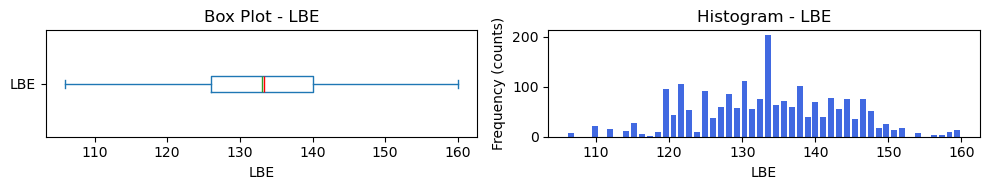

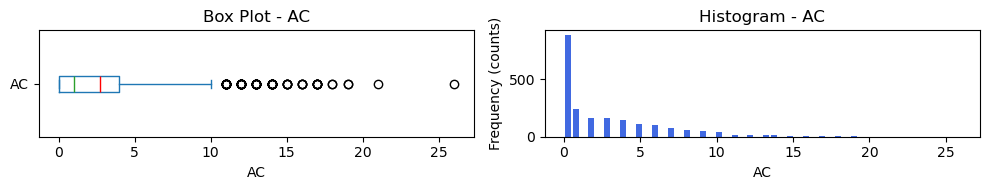

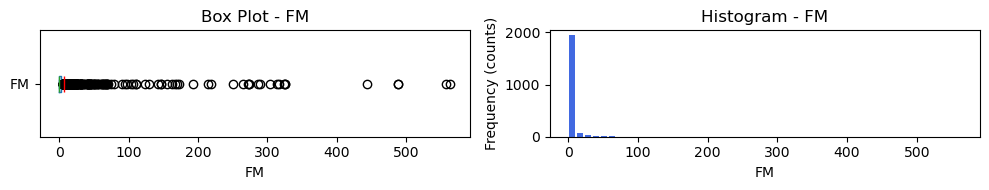

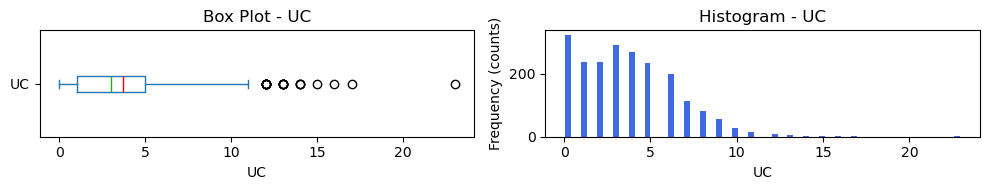

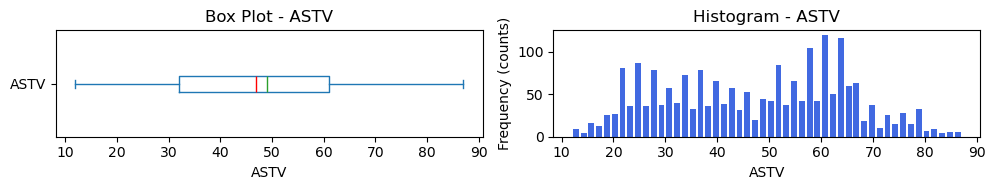

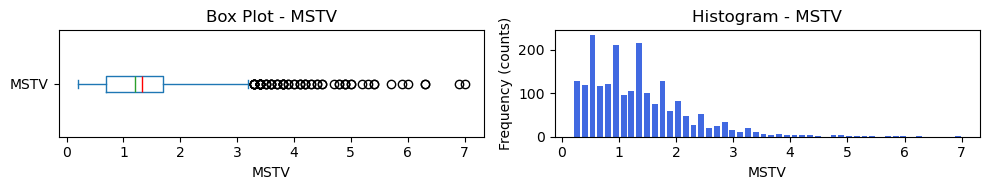

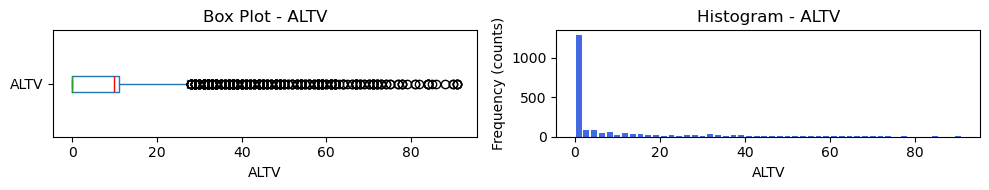

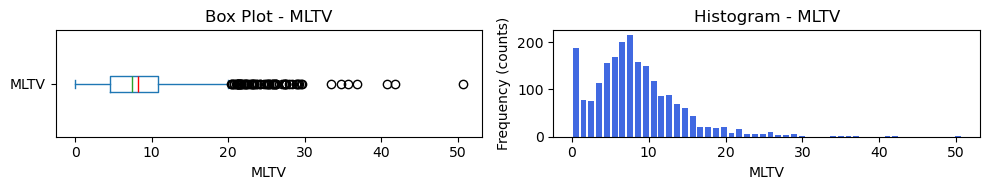

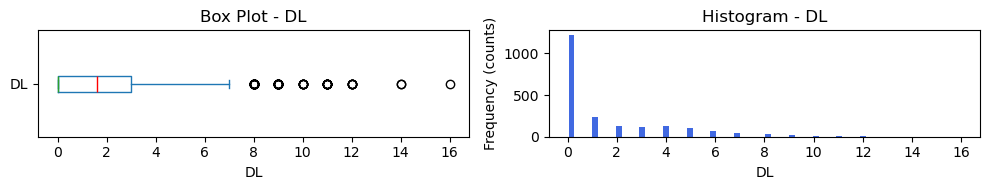

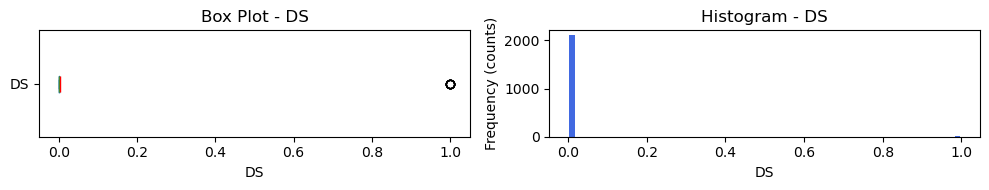

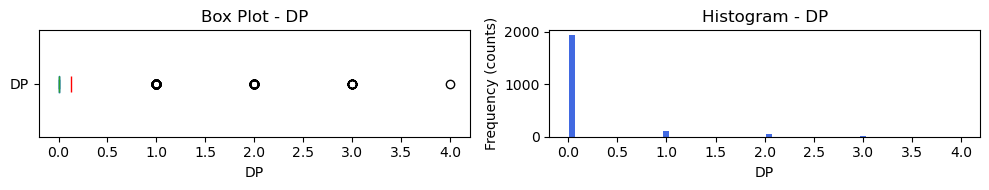

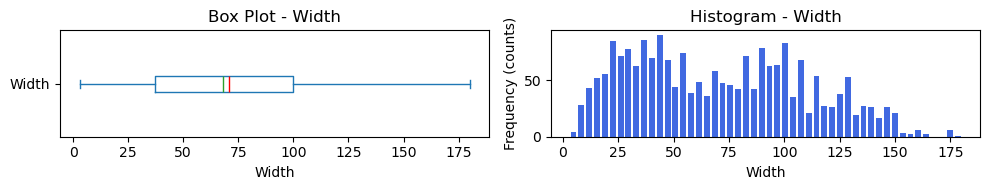

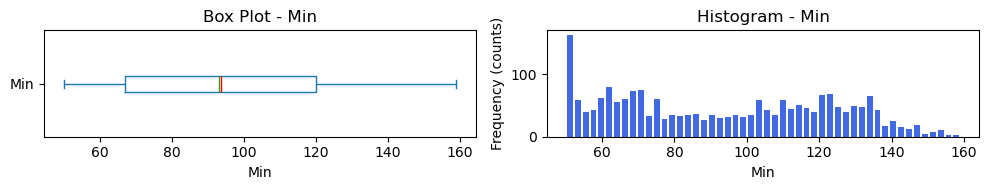

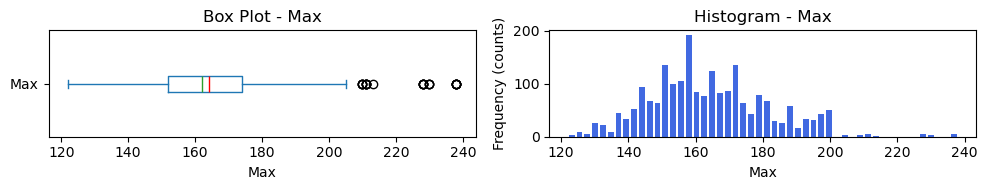

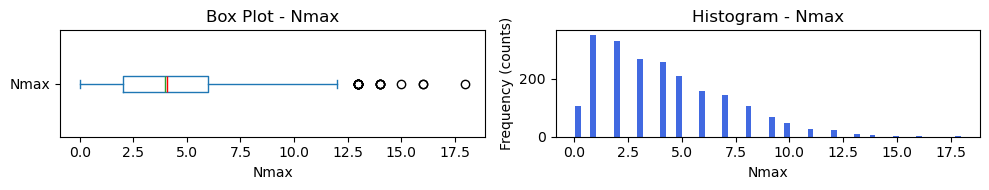

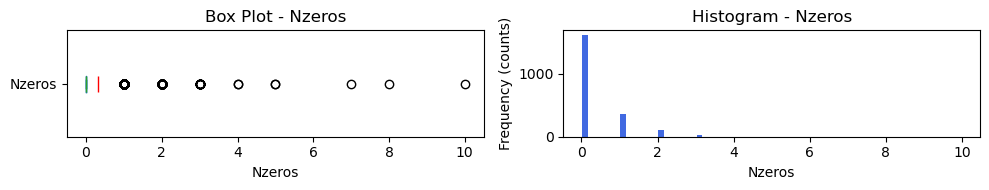

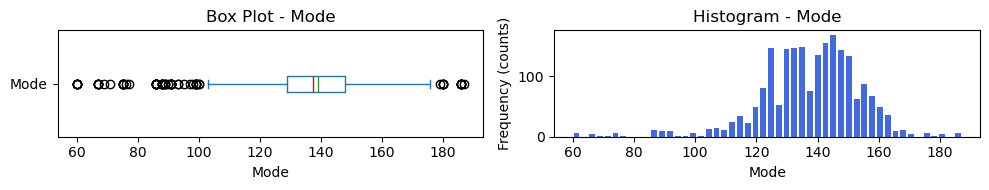

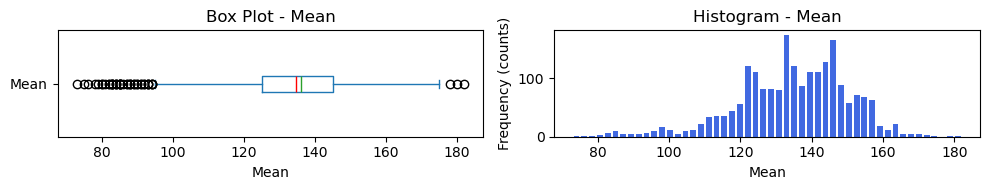

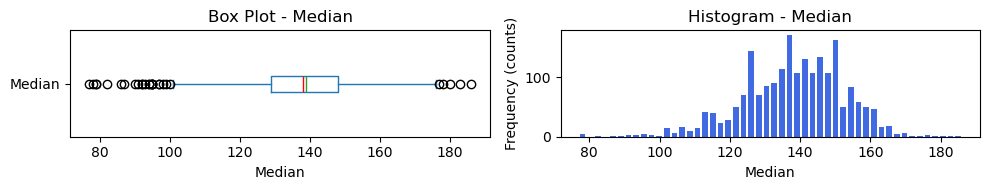

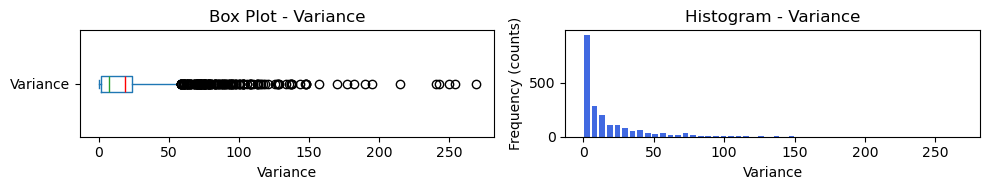

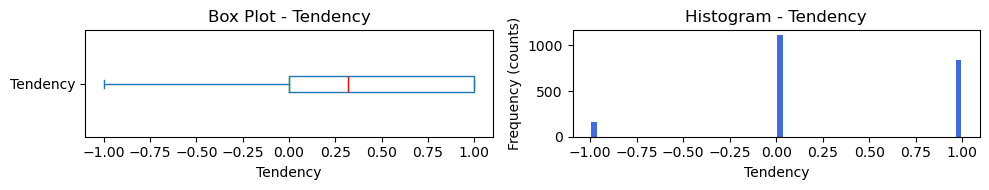

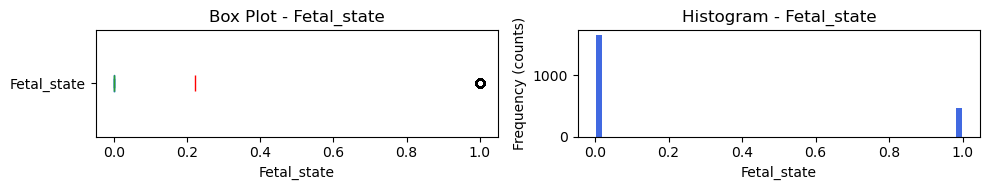

In [19]:
# Iterate over all variables
for variable in data.columns:
  # Create the figure
  fig, axes = plt.subplots(1, 2, figsize=(10, 2))

  # Plot 1 - BoxPlot
  data[variable].plot(kind='box', 
                      vert=False, 
                      showmeans=True,  # To show the mean
                      meanline=True,   # To show the mean line
                      meanprops={'color': 'red', 'linestyle': '-'}, # mean in red
                      ax=axes[0]
                     )
  axes[0].set_title(f'Box Plot - {variable}')
  axes[0].set_xlabel(variable)

  # Plot 2 - Histogram
  data[variable].plot(kind='hist',
                      bins=50,  # To adjust the number of bins to the number of unique values: bins = len(data[variable].value_counts())
                      rwidth=0.75,
                      color='royalblue',
                      ax=axes[1]
                     )
  axes[1].set_title(f'Histogram - {variable}')
  axes[1].set_xlabel(variable)
  axes[1].set_ylabel('Frequency (counts)')


  plt.tight_layout()  
  plt.show()


As shown in the plots, it is possible to distinguish between continuous and discrete quantitative variables, as well as categorical variables like the target variable 'Fetal_state'.

Distribution of the categorical target variable **'Fetal state'**:

Fetal_state
0    1646
1     466
Name: count, dtype: int64

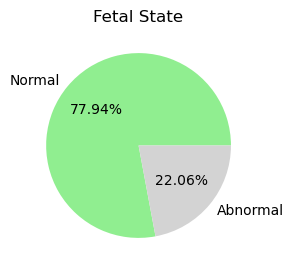

In [21]:
# The Fetal_state variable is represented in a Pie chart
display(data['Fetal_state'].value_counts())

# Pie Chart
plt.figure(figsize=(3, 3))

a, b = data['Fetal_state'].value_counts()
plt.pie([a, b], labels=["Normal", "Abnormal"], autopct="%1.2f%%", colors=['lightgreen', 'lightgray'])
plt.title('Fetal State')
#plt.savefig("Fetal_state.png", dpi=600)
plt.show()

> The distribution is **imbalanced**, so it's important to keep this in mind when splitting the dataset to ensure a fair representation of both classes. 

### 2.2. Multivariate Analysis


#### 2.2.1. Correlation Matrix

The **Pearson correlation coefficient** has been calculated for the numerical variables of the dataset. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two numerical variables. It ranges from -1 to 1. A value of 0 indicates no linear relationship between the variables, 1 indicates a perfect positive relationship, and -1 indicates a perfect negative relationship. In other words, non-zero values indicate that one variable increases (if positive) or decreases (if negative) depending on the other. Remember that correlation does not imply causality.

In [25]:
# The Pearson correlation coefficient is calculated for each pair of numerical variables
corr = data.corr()

> **Note**: The pd.corr() method also offers the Kendall and Spearman correlation methods. Link to the official documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

<Axes: >

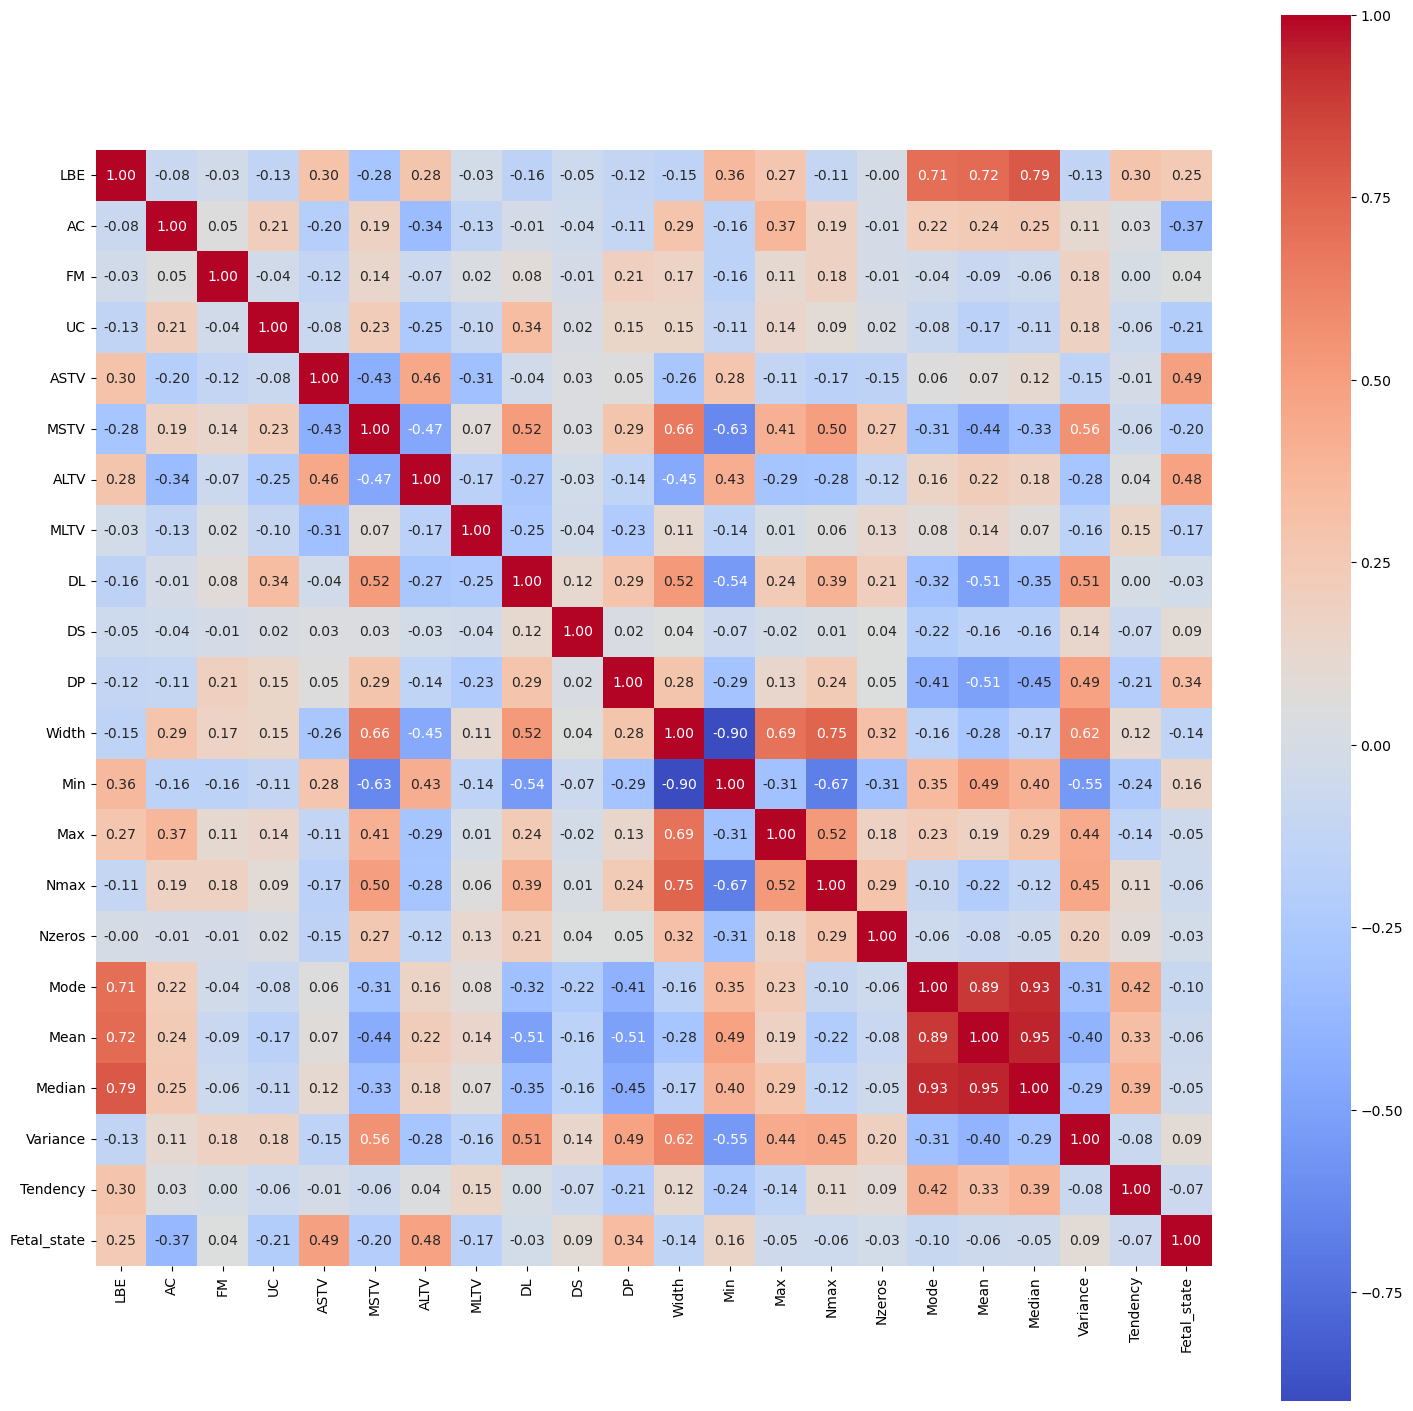

In [27]:
# The coefficients are represented with a heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
#plt.savefig("Corr.png", dpi=600)

> The following are the 3 explanatory variables with the highest correlation to **Fetal_state**:
> - **ASTV** (Pearson Coef. = 0.49): percentage of time with abnormal short-term variability. The coefficient indicates a moderate positive linear correlation between this variable and the Fetal_state variable.
> - **ALTV** (Pearson Coef. = 0.48): percentage of time with abnormal long-term variability. The coefficient indicates a moderate positive linear correlation between this variable and the Fetal_state variable.
> - **AC** (Pearson Coef. = -0.37): number of accelerations per second, counted in discrete units. The coefficient indicates a moderate negative linear correlation between this variable and the Fetal_state variable (as one increases, the other decreases).

On the other hand, it is worth noting that **there are several strong correlations between independent variables**. An obvious example is the strong positive correlation observed between the variables mode, median, and mean. A strong negative correlation (Pearson Coef. = -0.9) is also observed between the 'Min' and 'Width' variables. Due to the assumption made by the Naive Bayes algorithm that explanatory variables are independent from each other, it is advisable to keep the correlation matrix data in mind to try to improve the model if necessary.


#### 2.2.2. Some extra plots

With the aim of visually representing some of the mentioned correlations between the explanatory variables of the dataset, a **scatter plot** visualization has been created between some of the previously mentioned variables. 

**Note**: If desired, it would be possible to create a comprehensive scatter plot table relating all variables using `sns.pairplot()`.


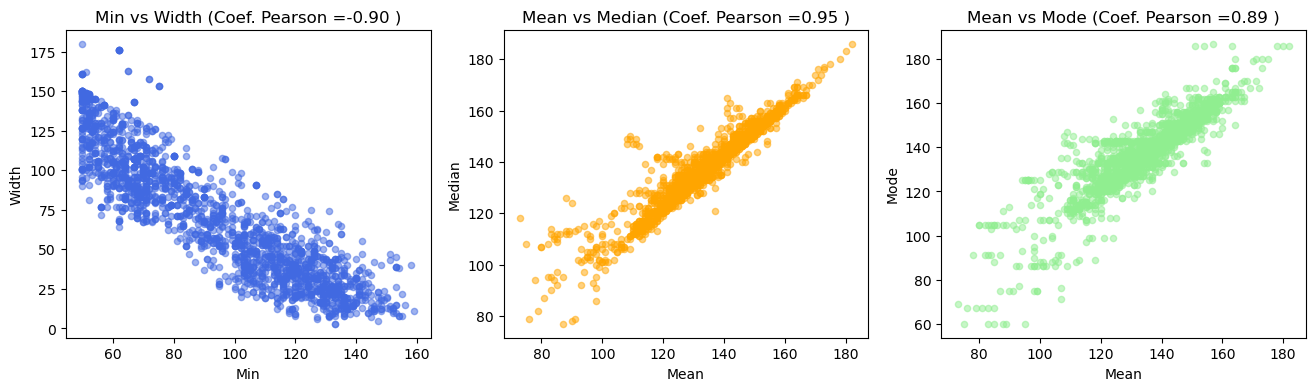

In [30]:
# Plot
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Plot 1 - Min vs Width
data.plot(kind = 'scatter', x = 'Min', y = 'Width', color = 'royalblue', alpha = 0.5, ax = axes[0])
axes[0].set_title(f'Min vs Width (Coef. Pearson ={corr['Min']['Width']:.2f} )')

# Plot 2 - Media vs Mediana
data.plot(kind = 'scatter', x = 'Mean', y = 'Median', color = 'orange', alpha = 0.5, ax = axes[1])
axes[1].set_title(f'Mean vs Median (Coef. Pearson ={corr['Mean']['Median']:.2f} )')

# Plot 3 - Meida vs Moda
data.plot(kind = 'scatter', x = 'Mean', y = 'Mode', color = 'lightgreen', alpha = 0.5, ax = axes[2])
axes[2].set_title(f'Mean vs Mode (Coef. Pearson ={corr['Mean']['Mode']:.2f} )')


plt.show()

- Visual analysis of the variable **Fetal_state** vs quantitative variables

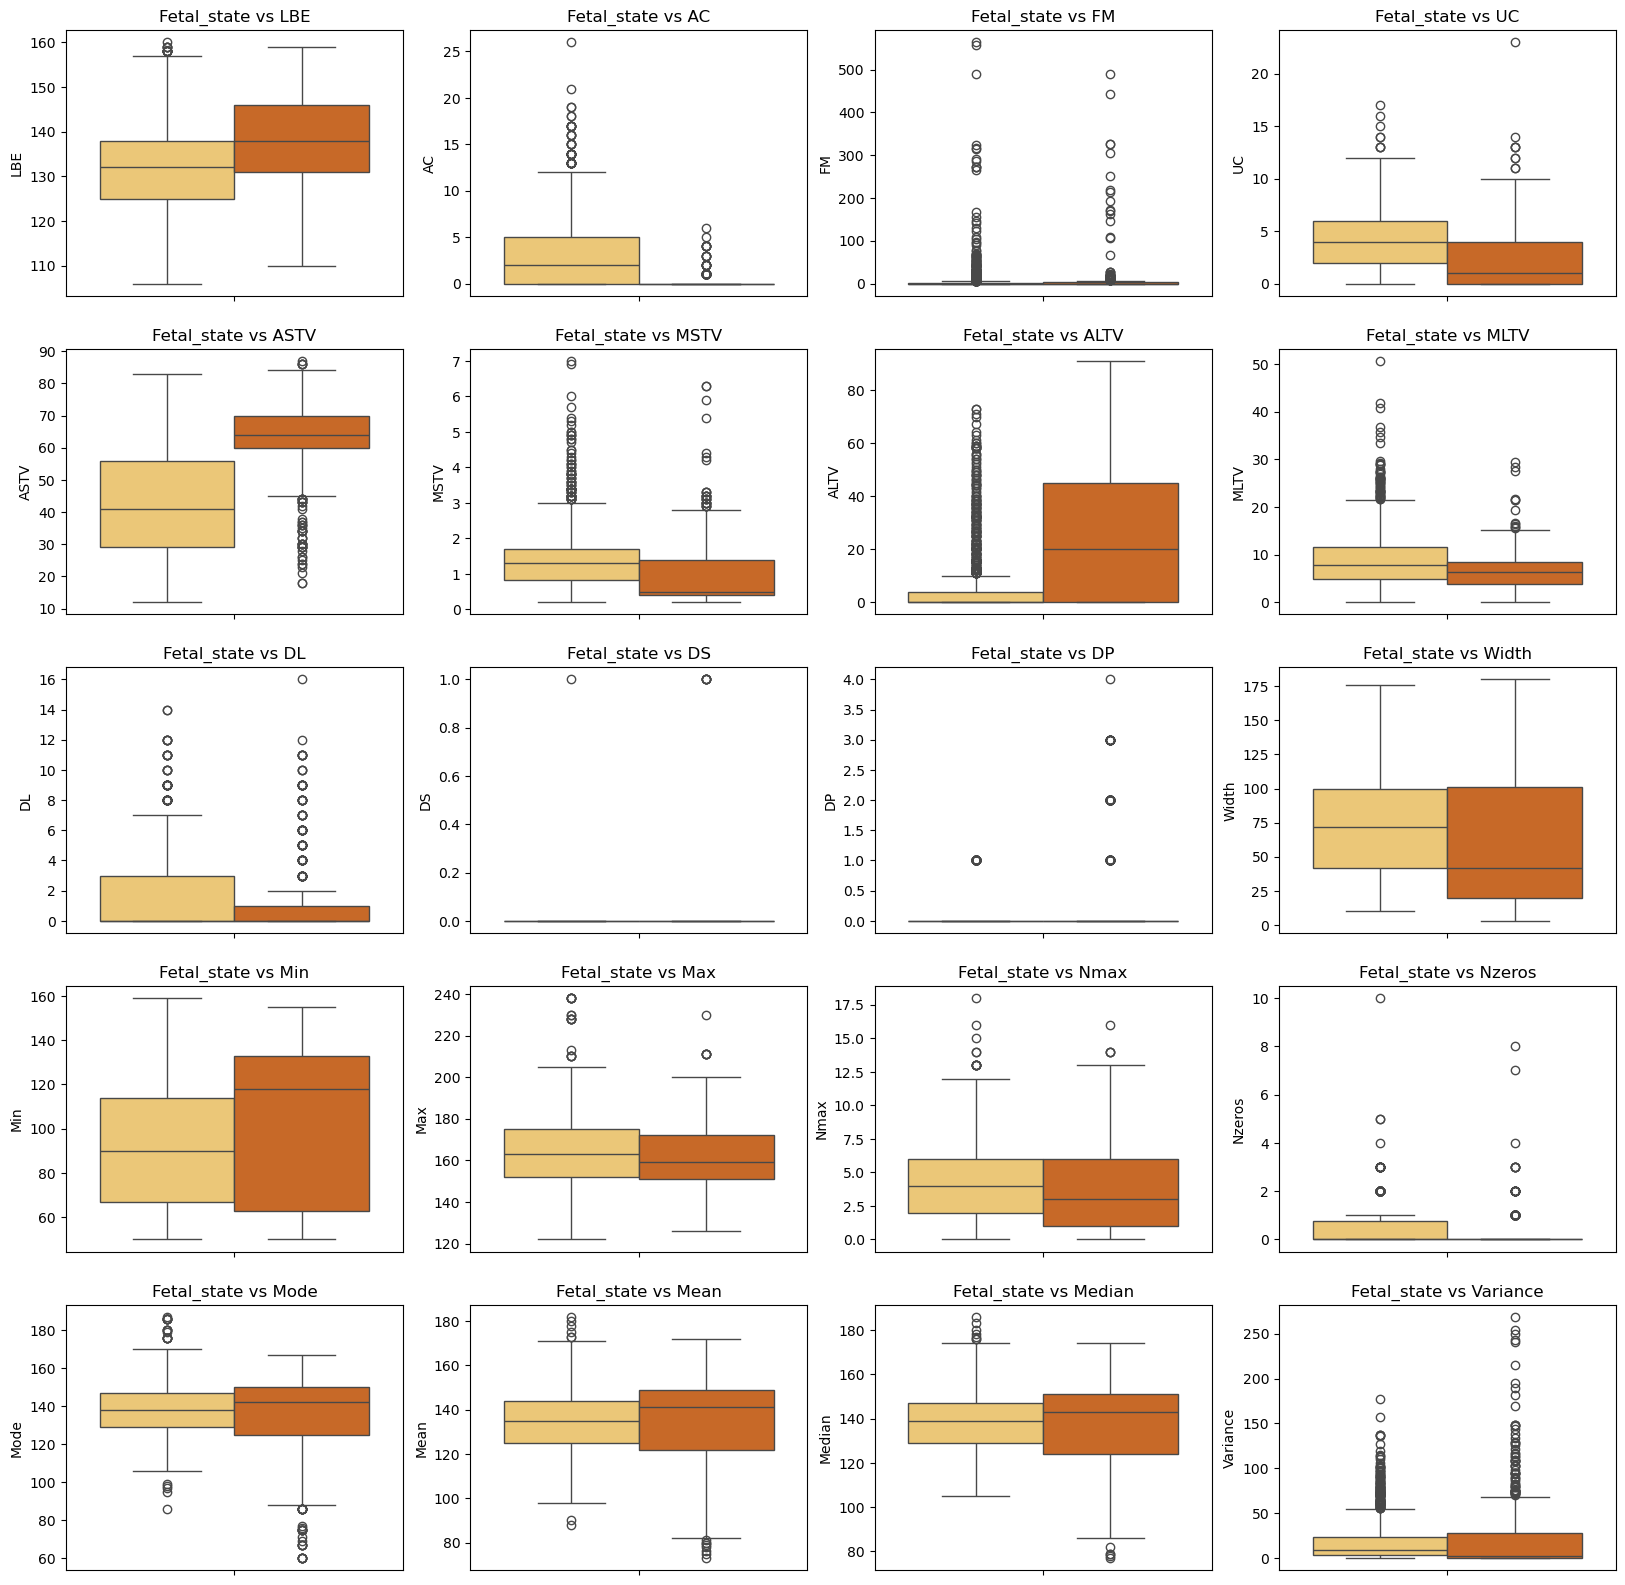

In [32]:
# List of non-categorical variables
non_categorical_variables = ["LBE", "AC", "FM", "UC", "ASTV", "MSTV", 
                             "ALTV", "MLTV", "DL", "DS","DP", 
                             "Width", "Min", "Max", "Nmax", 
                             "Nzeros", "Mode", "Mean","Median", 
                             "Variance"
                            ]
fig, axes = plt.subplots(5, 4 , figsize=(20, 20))
fila = 0
col = 0
for non_categorical in non_categorical_variables:
    sns.boxplot(hue = 'Fetal_state' , y= non_categorical, data = data, palette="YlOrBr", legend = False, ax = axes[fila][col])
    axes[fila][col].set_title(f'Fetal_state vs {non_categorical}')
    col += 1
    if col > 3:
        col = 0
        fila +=1  
plt.show()   

> In the correlation matrix, it was observed that the 3 explanatory variables with the highest correlation to **Fetal_state** were **ASTV** (Pearson Coef. = 0.49), **ALTV** (Pearson Coef. = 0.48), and **AC** (Pearson Coef. = -0.37). This is visually confirmed in this section, as when observing the corresponding plots for these 3 variables in relation to 'Fetal_state', it is clear that these are the 3 variables with the greatest difference in the boxplot between 'Fetal_state = 0' and 'Fetal_state = 1'.


## 3. Outliers

###  3.1 Outliers detection (IQR and Z-score)

It is important to identify the presence of possible anomalous data that deviate from the mean of the distribution of the rest of the records. These anomalous data are known as *outliers*. Two outlier detection methods have been used:

- **IQR**: or interquartile range. The interquartile range is the central 50% of the data. If the data is divided into 4 equal portions or quartiles (Q1-Q4), the two central quartiles represent the IQR, i.e., IQR = Q3−Q1. This method considers any data points outside of 1.5 times the IQR from Q1 or Q3 as outliers, i.e., $[Q1−1.5×IQR, Q3+1.5×IQR]$.

- **Z-score**: This calculates how many standard deviations each value is from the mean. In other words, the mean will be at 0, the standard deviation at ±1, and the values will be distributed in a range from +infinity to -infinity, being positive if greater than the mean and negative if less than the mean. In a normal distribution:
  - **95%** of the values are between \( Z = -2 \) and \( Z = 2 \).
  - **99.7%** of the values are between \( Z = -3 \) and \( Z = 3 \). For this reason, it is common to use a threshold of ±3 to detect outliers.

The Z-score is calculated as follows: for a sample `x`, `z = (x - u) / s` where `u` is the mean and `s` is the standard deviation. The `StandardScaler()` from sklearn can also be used to calculate it.


In [37]:
# IQR method

# Create a new dataframe to store the number of outliers
n_outliers = pd.DataFrame()

# Select the non-categorical variables
non_categorical_variables = [
    "LBE", "AC", "FM", "UC", "ASTV", "MSTV", "ALTV", "MLTV", 
    "DL", "DP", "Width", "Min", "Max", "Nmax", "Nzeros", "Mode", 
    "Mean", "Median", "Variance"
]

# Iterate over the non-categorical variables
for variable in non_categorical_variables:
    # Calculate the 1st and 3rd quartiles
    q1, q3 = data[variable].quantile([0.25, 0.75]) 
    IQR = q3 - q1  # Calculate the IQR
    lower_bound = q1 - 1.5 * IQR  # Calculate the lower bound
    upper_bound = q3 + 1.5 * IQR  # Calculate the upper bound
    
    # Count the number of outliers outside the bounds
    outliers_count = ((data[variable] < lower_bound) | (data[variable] > upper_bound)).sum()
    
    # Store the count of outliers in the dataframe
    n_outliers[variable] = [outliers_count]

# Transpose and reset the index for better readability
n_outliers = n_outliers.transpose().reset_index()
n_outliers.columns = ['Variable', "n_outliers_IQR"]

# Display the result
n_outliers

,Variable,n_outliers_IQR
0,LBE,0
1,AC,83
2,FM,307
3,UC,22
4,ASTV,0
5,MSTV,70
6,ALTV,304
7,MLTV,71
8,DL,81
9,DP,178


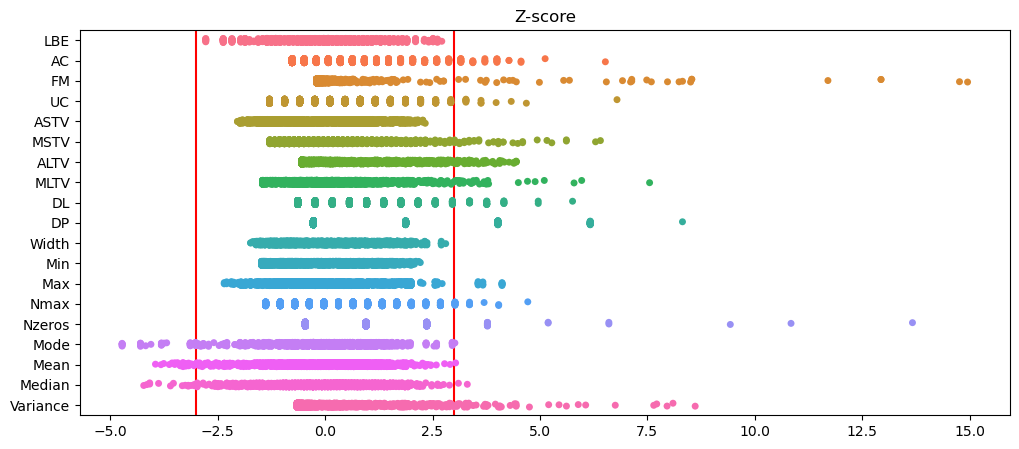

In [38]:
# Z-SCORE METHOD

# Create a new dataframe for Z-scores
Z_scores = pd.DataFrame()

# Create an empty list to store the number of outliers for each variable
n_outliers_Z_score = []

# Iterate over the non-categorical variables
for variable in non_categorical_variables:
    
    # Calculate the Z-score for each variable and store the results in the new dataframe 'Z_scores'
    Z_scores[variable] = (data[variable] - data[variable].mean()) / data[variable].std()
    
    # Identify the indices of the rows considered outliers based on the Z-score
    indices = Z_scores[variable].loc[(Z_scores[variable] > 3) | (Z_scores[variable] < -3)].index.tolist()

    # Store the number of outliers in the previously created list
    n_outliers_Z_score.append(len(indices))

# Add a new column to the 'n_outliers' dataframe with the Z-score outlier data
n_outliers["n_outliers_Z_score"] = n_outliers_Z_score

# Plot the transformed Z-scores
plt.figure(figsize=(12, 5))

sns.stripplot(data=Z_scores, orient='h')

plt.title('Z-score')

# Draw vertical red lines at the +3 and -3 thresholds
plt.axvline(-3, color='red')
plt.axvline(3, color='red')

plt.show()

In [39]:
n_outliers

,Variable,n_outliers_IQR,n_outliers_Z_score
0,LBE,0,0
1,AC,83,35
2,FM,307,31
3,UC,22,13
4,ASTV,0,0
5,MSTV,70,33
6,ALTV,304,58
7,MLTV,71,33
8,DL,81,28
9,DP,178,69


### 3.1 Outliers Treatment

There are some variables with a large number of outliers. To minimize these effects, the data from some variables with the highest number of outliers have been transformed:

- **Variable `AC`**: **Logarithmic transformation**. Is has been used log(x+1) to avoid issues with zero values. This transformation smooths out high values.
- **Variable `FM`**: Variability has been reduced through ***binning*** to only 3 categories coded as:
    - 0: if the variable takes the value 0
    - 1: if the variable takes values between 0 and 10
    - 2: if the variable takes values greater than 10
- **Variable `UC`**: **Logarithmic transformation**. We use log(x+1) to avoid issues with zero values. This transformation smooths out high values.
- **Variable `MSTV`**: The **winsorization** method has been used. Extreme values are replaced by the **98th percentile**. This reduces the influence of extreme values without distorting the distribution too much.
- **Variable `ALTV`**: The **winsorization** method has been used. Extreme values are replaced by the **95th percentile**. This reduces the influence of extreme values without distorting the distribution too much.
- **Variable `MLTV`**: The **winsorization** method has been used. Extreme values are replaced by the **98th percentile**. This reduces the influence of extreme values without distorting the distribution too much.
- **Variable `DL`**: **Logarithmic transformation**. We use log(x+1) to avoid issues with zero values. This transformation smooths out high values.
- **Variable `DP`**: Variability has been reduced through ***binning*** to only 3 categories coded as:
    - 0: if the variable takes the value 0
    - 1: if the variable takes the value 1
    - 2: if the variable takes the value 2 or greater
- **Variable `Max`**: The **winsorization** method has been used. Extreme values are replaced by the **98th percentile**. This reduces the influence of extreme values without distorting the distribution too much.
- **Variable `Nmax`**: The **winsorization** method has been used. Extreme values are replaced by the **98th percentile**. This reduces the influence of extreme values without distorting the distribution too much.
- **Variable `Nzeros`**: Variability has been reduced through ***binning*** to only 3 categories coded as:
    - 0: if the variable takes the value 0
    - 1: if the variable takes values between 0 and 3
    - 2: if the variable takes values greater than 3
- **Variable `Mode`**: The **winsorization** method has been used. Extreme values are replaced by the **03rd percentile**. This reduces the influence of extreme values without distorting the distribution too much.
- **Variable `Mean`**: The **winsorization** method has been used. Extreme values are replaced by the **02nd percentile**. This reduces the influence of extreme values without distorting the distribution too much.
- **Variable `Median`**: The **winsorization** method has been used. Extreme values are replaced by the **02nd percentile**. This reduces the influence of extreme values without distorting the distribution too much.
- **Variable `Variance`**: The *Variance* variable has been transformed into *Standard Deviation*. Since the standard deviation is defined as the **square root** of the variance, this metric has been calculated and substituted. This helps minimize extreme variations. Additionally, the standard deviation still presented many outliers, so it has been **winsorized to the 98th percentile**.


In [41]:
# Create a new DataFrame for the transformed data
data_transformed = pd.DataFrame()

# Add the variables that will not be transformed
data_transformed = data[['LBE', 'ASTV', 'DS', 'Width', 'Min', 'Tendency', 'Fetal_state']]

# Show the first rows of the transformed data
data_transformed.head()

,LBE,ASTV,DS,Width,Min,Tendency,Fetal_state
0,120,73,0,64,62,1,1
1,132,17,0,130,68,0,0
2,133,16,0,130,68,0,0
3,134,16,0,117,53,1,0
4,132,16,0,117,53,1,0


**Features Transformation:**

In [43]:
# Square Root Transformation
data_transformed['STD'] = np.sqrt(data['Variance'])

# Logarithmic Transformations
data_transformed['AC_log'] = np.log1p(data['AC'])  # log(AC + 1)
data_transformed['UC_log'] = np.log1p(data['UC'])  # log(UC + 1)
data_transformed['DL_log'] = np.log1p(data['DL'])  # log(DL + 1)

# Winsorization (done separately as percentiles change)
data_transformed["MSTV_winsorized"] = winsorize(data["MSTV"], limits=[0, 0.02])
data_transformed["ALTV_winsorized"] = winsorize(data["ALTV"], limits=[0, 0.05])
data_transformed["MLTV_winsorized"] = winsorize(data["MLTV"], limits=[0, 0.02])
data_transformed["Max_winsorized"] = winsorize(data["Max"], limits=[0, 0.02])
data_transformed["Nmax_winsorized"] = winsorize(data["Nmax"], limits=[0, 0.02])
data_transformed["Mode_winsorized"] = winsorize(data["Mode"], limits=[0.03, 0])
data_transformed["Mean_winsorized"] = winsorize(data["Mean"], limits=[0.02, 0])
data_transformed["Median_winsorized"] = winsorize(data["Median"], limits=[0.02, 0])

# Winsorize the 'STD' column
data_transformed['STD_winsorized'] = winsorize(data_transformed["STD"], limits=[0, 0.02])

# Drop the original 'STD' column because we already have the winsorized version
data_transformed.drop('STD', axis=1, inplace=True)

# BINNING - Categorizing continuous variables into bins

# Variable 'FM' 
bins = [-1, 0, 10, max(data['FM'])]
categories = [0, 1, 2]
data_transformed['FM_binned'] = pd.cut(data['FM'], bins, labels=categories, include_lowest=True)
data_transformed['FM_binned'] = data_transformed['FM_binned'].astype(int)

# Variable 'DP' 
bins = [-1, 0, 1, max(data['DP'])]
categories = [0, 1, 2]
data_transformed['DP_binned'] = pd.cut(data['DP'], bins, labels=categories, include_lowest=True)
data_transformed['DP_binned'] = data_transformed['DP_binned'].astype(int)

# Variable 'Nzeros'
bins = [-1, 0, 3, max(data['Nzeros'])]
categories = [0, 1, 2]
data_transformed['Nzeros_binned'] = pd.cut(data['Nzeros'], bins, labels=categories, include_lowest=True)
data_transformed['Nzeros_binned'] = data_transformed['Nzeros_binned'].astype(int)

- **Comparison before vs after data transformation**:

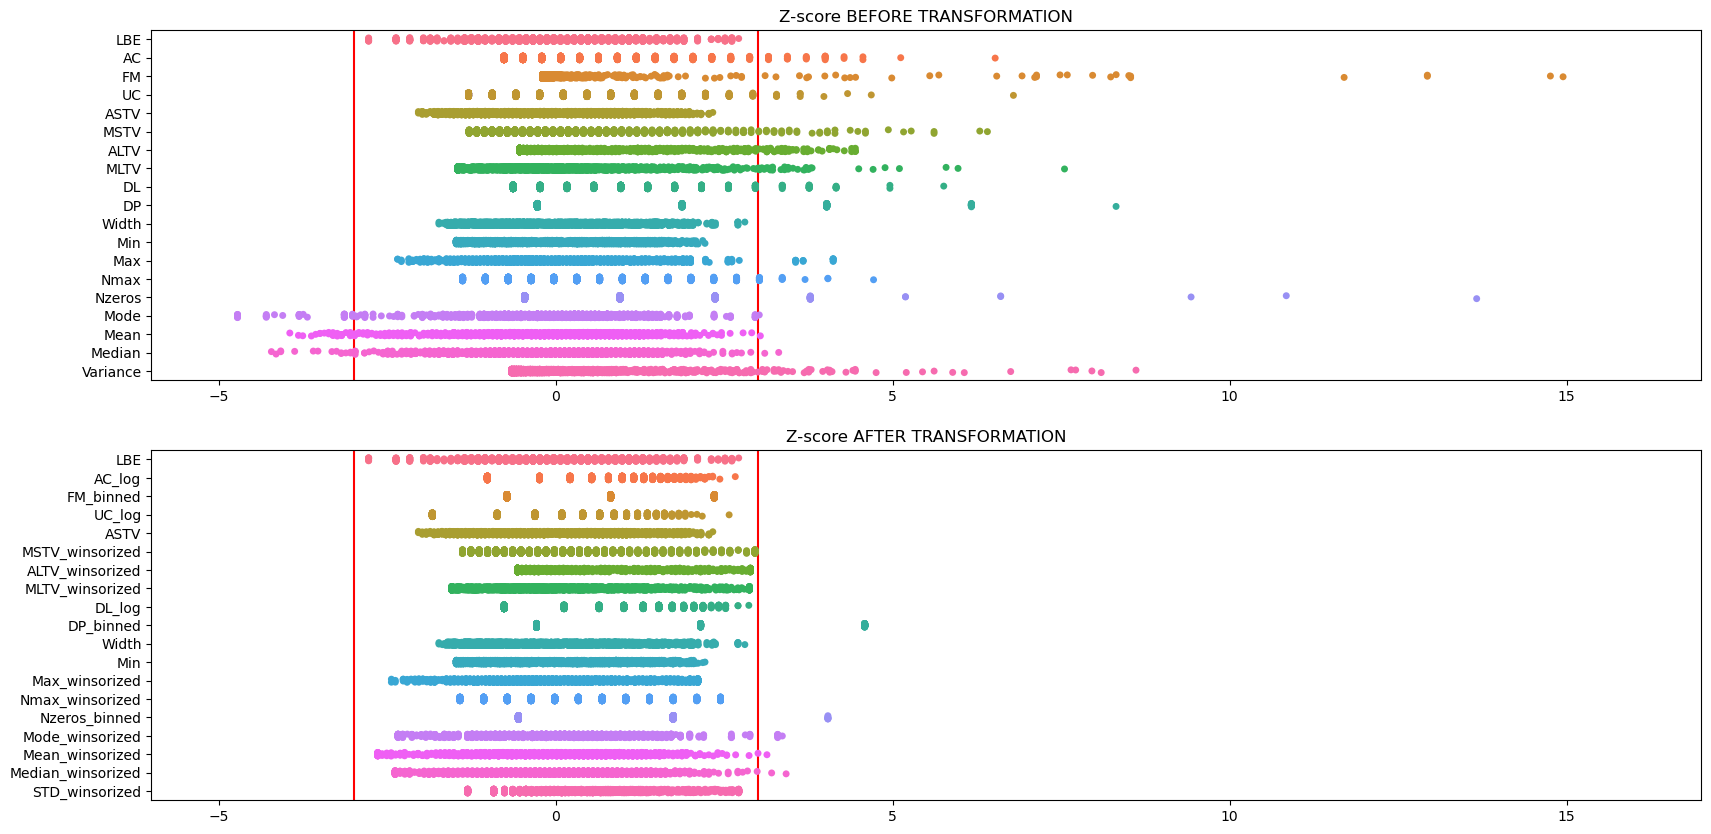

In [45]:
# COMPARISON BEFORE VS AFTER

# Create a new DataFrame to store Z-scores
Z_scores_new = pd.DataFrame()

# List to store the number of outliers
n_outliers_Z_score = []

# Variables to be analyzed after transformation
new_variables = [
    'LBE',
    'AC_log',
    'FM_binned',
    'UC_log',
    'ASTV',
    'MSTV_winsorized',
    'ALTV_winsorized',
    'MLTV_winsorized',
    'DL_log',
    'DP_binned',
    'Width',
    'Min',
    'Max_winsorized',
    'Nmax_winsorized',
    'Nzeros_binned',
    'Mode_winsorized',
    'Mean_winsorized',
    'Median_winsorized',
    'STD_winsorized'
]

# Iterate over the selected variables to calculate Z-scores
for variable in new_variables:  
    
    # Calculate the Z-score for each variable and store the results in the new dataframe 'Z_scores_new'
    Z_scores_new[variable] = (data_transformed[variable] - data_transformed[variable].mean()) / data_transformed[variable].std()
    
    # Identify the indices of rows that are considered outliers (Z-score > 3 or Z-score < -3)
    indices = Z_scores_new[variable].loc[(Z_scores_new[variable] > 3) | (Z_scores_new[variable] < -3)].index.tolist()

    # Store the number of outliers for this variable
    n_outliers_Z_score.append(len(indices))

# Add the number of outliers after transformation to the dataframe
n_outliers["n_outliers_Z_score_TRANSFORMED"] = n_outliers_Z_score

# Plot the Z-scores before and after transformation
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# Plot the Z-scores before transformation
sns.stripplot(data=Z_scores, orient='h', ax=axes[0])
axes[0].set_title('Z-score BEFORE TRANSFORMATION')
axes[0].axvline(-3, color='red')
axes[0].axvline(3, color='red')
axes[0].set_xlim(-6, 17)

# Plot the Z-scores after transformation
sns.stripplot(data=Z_scores_new, orient='h', ax=axes[1])
axes[1].set_title('Z-score AFTER TRANSFORMATION')
axes[1].axvline(-3, color='red')
axes[1].axvline(3, color='red')
axes[1].set_xlim(-6, 17)

# Save the plot (optional)
# plt.savefig("Outliers.png", dpi=600)

# Display the plot
plt.show()


The changes made have drastically reduced the number of outliers present in the data.

## 4. Splitting the Dataset

Before training the algorithms, it is necessary to split the data into Training and Test sets. 

The following split has been chosen:
- Training set size = **70%**
- Test set size = **30%**

Additionally, **stratified sampling** has been applied to ensure that the target variable, which is imbalanced (as detected in the EDA), is proportionally represented in both the training and test sets.

In [49]:
# Splitting into explanatory variables (X) and Fetal_state (y)
X = data_transformed.drop('Fetal_state', axis=1)
y = data_transformed['Fetal_state']

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y, random_state = 0)

In [50]:
# Check of the datasets size
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1478, 21)
(1478,)
(634, 21)
(634,)


## 5. Feature Scaling

Feature scaling in machine learning is a crucial step in data pre-processing before building a model. Proper scaling can significantly impact the performance of a model, making the difference between a weak and a strong one. Since KNN and SVM are based on the distances between points, it will be essential to scale the variables so that all data is within the same range. To achieve this, the decision was made to remove the mean and set the standard deviation to 1, meaning that the Z-score has been calculated through the `StandardScaler()` from sklearn:

*You can read more about different scalers in https://scikit-learn.org/stable/modules/preprocessing.html*

> Note: **Data leakage** occurs when information from the test set or future data influences the model during training, leading to unrealistic results and biased model evaluation. This happens when the model has access to data it shouldn't, such as performing preprocessing (e.g., feature scaling) before splitting the dataset, or including features that are improperly correlated with the target.

> Avoiding data leakage is crucial for obtaining an accurate evaluation of the model's performance on unseen data and **this is why Feature Scaling should be made after splitting the dataset**

In [52]:
# The scaler object is defined
scaler = StandardScaler().fit(X_train)

# Transformation
standardized_X_train = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

## 6. Training the Machine Learning Algorithms

### 6.1. Understanding Coarse-to-Fine Hyperparameter Tunning

Using `RandomizedSearchCV` followed by `GridSearchCV` methods from sklearn [(learn more)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html) is an effective strategy for hyperparameter optimization with a "coarse to fine" search approach:

1. **First, RandomizedSearchCV is used**:
   - RandomizedSearchCV explores a wide range of hyperparameter values by testing random combinations within a defined space.
   - This helps perform the **coarse search**, quickly covering a large search space.



2. **Then, GridSearchCV is used**:
   - Once promising ranges of hyperparameters are identified, **GridSearchCV** performs an exhaustive search over those narrowed-down values.
   - This is ideal for **fine search**, ensuring precise tuning of hyperparameters.

This combination maximizes efficiency and helps in finding the optimal model configuration.

In addition, during the Hyperparameter search, stratified cross-validation is used with `StratifiedKFold()`  [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html). Stratified K-Fold is a variation of K-Fold cross-validation that ensures each fold of the dataset has the same proportion of each target class as the entire dataset. This is particularly useful when dealing with imbalanced datasets (as this case), as it prevents the model from being biased toward overrepresented classes during training.

### 6.2. Naive Bayes

Naive Bayes is a classification algorithm based on **Bayes' Theorem**, which is used to predict the probability of different classes based on the values of input features. It is called "naive" because it assumes that the features are independent of each other, which is a simplifying assumption that doesn't always hold in real-world data. Despite this assumption, Naive Bayes often performs surprisingly well.

Naive Bayes is fast, simple, and works well with large datasets, especially when features are categorical or independent.


Hyperparameters (Gaussian Naive Bayes):


- `var_smoothing`:
  - This parameter adds a small value to the variance of each feature to avoid division by zero or very small numbers in the Gaussian probability formula. 
  - Typical values: values in the range of `1e-9` to `1e0`.

In [57]:
# Naive Bayes classifier object is created
gnb = GaussianNB()
gnb

GaussianNB()

#### 6.2.1. Hyperparameter Search

In [59]:
# 1. Parameter grid for RandomizedSearchCV (coarse search) is defined
param_dist = {
    'var_smoothing': np.logspace(-9, 0, 10)  # Range of values for var_smoothing from 1e-9 to 1e0
}

# Stratified K-Fold cross-validation strategy is defined
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# RandomizedSearchCV for coarse search is performed
random_search = RandomizedSearchCV(gnb, 
                                   param_distributions = param_dist, 
                                   n_iter = 20, 
                                   cv = stratified_kfold, 
                                   scoring = 'roc_auc', 
                                   n_jobs = -1, 
                                   random_state=0
                                  )
random_search.fit(standardized_X_train, y_train)

# Best parameters from RandomizedSearchCV are printed
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

# 2. Parameter grid for GridSearchCV (fine search) is defined
param_grid = {
    'var_smoothing': np.linspace(random_search.best_params_['var_smoothing'] / 2, 
                                 random_search.best_params_['var_smoothing'] * 2, 5
                                )
}

# GridSearchCV for fine search is performed
grid_search = GridSearchCV(gnb, 
                           param_grid = param_grid, 
                           cv = stratified_kfold, 
                           scoring = 'roc_auc', 
                           n_jobs = -1
                          )
grid_search.fit(standardized_X_train, y_train)

# Best parameters from GridSearchCV are printed
print("Best parameters from GridSearchCV:", grid_search.best_params_)
print("Best stimator from GridSearchCV:", grid_search.best_estimator_)

# Results are retrieved and displayed
results = pd.DataFrame(grid_search.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending=False) \
    .head(10)

Best parameters from RandomizedSearchCV: {'var_smoothing': 0.1}
Best parameters from GridSearchCV: {'var_smoothing': 0.2}
Best stimator from GridSearchCV: GaussianNB(var_smoothing=0.2)


,param_var_smoothing,mean_test_score,std_test_score
4,0.2000,0.943195,0.007233
3,0.1625,0.943166,0.007514
2,0.1250,0.942831,0.007969
1,0.0875,0.942536,0.008423
0,0.0500,0.942081,0.008776


#### 6.2.2. Model Training
Once the best value for the `var_smoothing` hyperparameter is known, the model can be trained:

In [61]:
# Naive Bayes classifier object is created
gnb = GaussianNB(var_smoothing = 0.2)
gnb

GaussianNB(var_smoothing=0.2)

In [62]:
# Store the initial time
start_time_nb = time.time()

# Train the model
gnb.fit(standardized_X_train, y_train.values.ravel())

# Make predictions for the training set and the test set
y_pred_train_nb = gnb.predict(standardized_X_train)
y_pred_test_nb = gnb.predict(standardized_X_test)

# Make predictions in terms of probabilities
y_pred_train_nb_proba = gnb.predict_proba(standardized_X_train)
y_pred_test_nb_proba = gnb.predict_proba(standardized_X_test)

# Store the final time
end_time_nb = time.time()

# Calculate how long the model took to fit and make predictions
total_time_nb = end_time_nb - start_time_nb
print(f'{total_time_nb} seconds')

0.003999233245849609 seconds


#### 6.2.3. Validation Report (global and overfitting)

The following **metrics** have been used to evaluate the performance of the algorithm:

- **Accuracy**: Measures the proportion of correct predictions out of the total samples. (TP + TN) / TOTAL  

- **Precision**: Indicates how many of the instances classified as positive are actually positive. TP / (TP + FP)  

- **Specificity** (True Negative Rate): Measures the proportion of negatives correctly identified. TN / (TN + FP)  

- **Recall** (Sensitivity or True Positive Rate): Represents the proportion of positives correctly identified. TP / (TP + FN)  

Where:  
TP = *True Positives* (Correctly classified positive instances)  
TN = *True Negatives* (Correctly classified negative instances)  
FP = *False Positives* (Incorrectly classified as positive)  
FN = *False Negatives* (Incorrectly classified as negative)  

- The **confusion matrix** has also been included.

- **ROC (Receiver Operating Characteristic)**: The ROC curve is a graphical representation of the true positive rate versus the false positive rate for different classification thresholds. It shows the model's ability to distinguish between positive and negative classes. An ideal ROC curve should be as far as possible from the diagonal line (which represents the performance of a random classifier) and should approach the upper left corner. X-axis: False Positive Rate. Y-axis: True Positive Rate.  

- **ROC-AUC (Area Under the Curve)**: The AUC under the ROC curve quantifies the area beneath the ROC curve and measures the model's ability to differentiate between classes. The AUC value ranges from 0 to 1. An **AUC of 1** indicates that the model has perfect performance, meaning it classifies all instances correctly. An **AUC of 0.5** suggests a model that does no better than random guessing.  

- **Precision-Recall (PR) Curve**: The PR curve shows the relationship between precision and recall (sensitivity) at various classifier decision thresholds. It is particularly useful when classes are imbalanced, as the ROC curve can be misleading in such cases. An ideal PR curve should be as close as possible to the upper right corner. **Precision**: Proportion of true positives over the total predicted positives. **Recall (Sensitivity)**: Proportion of true positives over the total actual positives.  

- **PR-AUC**: The AUC under the PR curve measures the area beneath the PR curve. Just like the AUC in the ROC curve, a higher AUC indicates better classification performance.  

- **F1-Score**: The F1-score is a metric that combines precision and recall into a single value and is calculated as their harmonic mean. It is useful **when classes are imbalanced**. An **F1-score close to 1** indicates a good balance between precision and recall. An **F1-score close to 0** suggests poor performance in one of the metrics.  


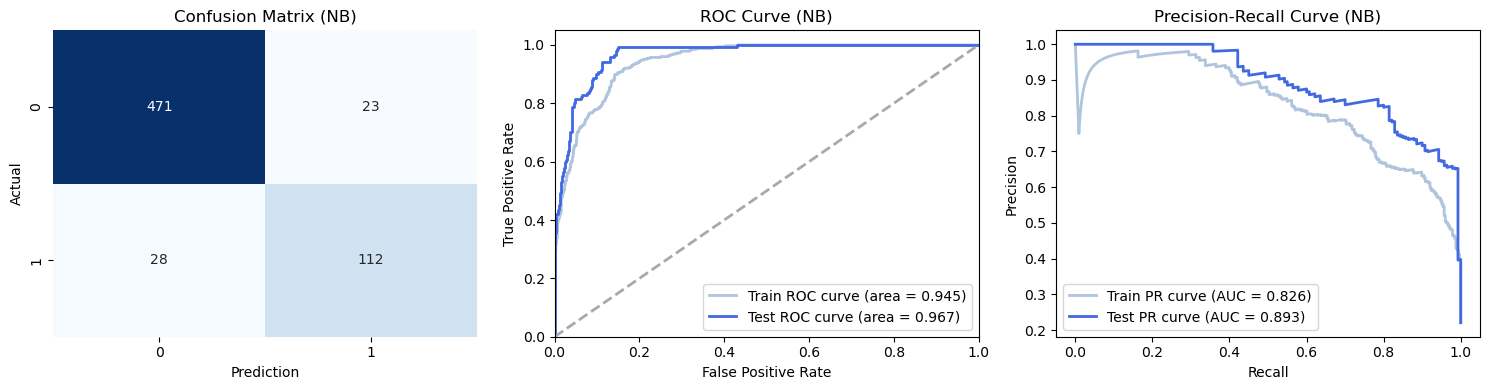

============ Metrics for NB ============
ROC-AUC Training Set: 	0.9445296523517384
ROC-AUC Test Set: 	0.9670040485829958
PR-AUC Training Set: 	0.8258362343983097
PR-AUC Test Set: 	0.8926223531912151
F1-score Training Set: 	0.7411003236245954
F1-score Test Set: 	0.8145454545454546
----------
Accuracy Test Set: 	0.919558359621451
Precision Test Set: 	0.8296296296296296
Recall Test Set: 	0.8
Specificity Test Set: 	0.9534412955465587
Trainig time (seconds): 0.003999233245849609


In [65]:
# ========= METRICS ==========================================================

# 1. ROC Curve and ROC-AUC for Training Set (NB)
fpr_train_nb, tpr_train_nb, _ = roc_curve(y_train, y_pred_train_nb_proba[:, 1])
roc_auc_train_nb = auc(fpr_train_nb, tpr_train_nb)

# 2. ROC Curve and AUC for Test Set (NB)
fpr_test_nb, tpr_test_nb, _ = roc_curve(y_test, y_pred_test_nb_proba[:, 1])
roc_auc_test_nb = auc(fpr_test_nb, tpr_test_nb)

# 3. PR Curve and PR-AUC for Training Set (NB)
precision_train_nb, recall_train_nb, _ = precision_recall_curve(y_train, y_pred_train_nb_proba[:, 1])
pr_auc_train_nb = average_precision_score(y_train, y_pred_train_nb_proba[:, 1])

# 4. PR Curve and PR-AUC for Test Set (NB)
precision_test_nb, recall_test_nb, _ = precision_recall_curve(y_test, y_pred_test_nb_proba[:, 1])
pr_auc_test_nb = average_precision_score(y_test, y_pred_test_nb_proba[:, 1])

# 5. F1 Score for Training Set (NB)
f1_train_nb = f1_score(y_train, y_pred_train_nb_proba[:, 1] > 0.5)

# 6. F1 Score for Test Set (NB)
f1_test_nb = f1_score(y_test, y_pred_test_nb_proba[:, 1] > 0.5)

# 7. Additional Metrics for Test Set - NB
accuracy_nb = accuracy_score(y_true=y_test, y_pred=(y_pred_test_nb_proba[:, 1] > 0.5))
precision_nb = precision_score(y_true=y_test, y_pred=(y_pred_test_nb_proba[:, 1] > 0.5))
recall_nb = recall_score(y_true=y_test, y_pred=(y_pred_test_nb_proba[:, 1] > 0.5))

# Confusion Matrix for Test Set - NB
conf_matrix_nb = confusion_matrix(y_true=y_test, y_pred=(y_pred_test_nb_proba[:, 1] > 0.5))
TN_nb, FP_nb, FN_nb, TP_nb = conf_matrix_nb.ravel()

# Specificity for Test Set - NB
specificity_nb = TN_nb / (TN_nb + FP_nb)


# ========= PLOTS ==========================================================

# Plot ROC Curves, Precision-Recall Curves, and Confusion Matrix Heatmap
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1 - Confusion Matrix Heatmap for NB
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["0", "1"], yticklabels=["0", "1"], cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix (NB)')
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('Actual')

# Plot 2 - ROC Curve for Training and Test (NB)
axes[1].plot(fpr_train_nb, tpr_train_nb, color='lightsteelblue', lw=2, label='Train ROC curve (area = %0.3f)' % roc_auc_train_nb)
axes[1].plot(fpr_test_nb, tpr_test_nb, color='royalblue', lw=2, label='Test ROC curve (area = %0.3f)' % roc_auc_test_nb)
axes[1].plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (NB)')
axes[1].legend(loc='lower right')

# Plot 3 - Precision-Recall Curve for Training and Test (NB)
axes[2].plot(recall_train_nb, precision_train_nb, color='lightsteelblue', lw=2, label='Train PR curve (AUC = %0.3f)' % pr_auc_train_nb)
axes[2].plot(recall_test_nb, precision_test_nb, color='royalblue', lw=2, label='Test PR curve (AUC = %0.3f)' % pr_auc_test_nb)
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve (NB)')
axes[2].legend(loc='lower left')

plt.tight_layout()
plt.show()

# Print Metrics for NB
print("============ Metrics for NB ============")
print(f'ROC-AUC Training Set: \t{roc_auc_train_nb}')
print(f'ROC-AUC Test Set: \t{roc_auc_test_nb}')
print(f'PR-AUC Training Set: \t{pr_auc_train_nb}')
print(f'PR-AUC Test Set: \t{pr_auc_test_nb}')
print(f'F1-score Training Set: \t{f1_train_nb}')
print(f'F1-score Test Set: \t{f1_test_nb}')
print('----------')
print(f'Accuracy Test Set: \t{accuracy_nb}')
print(f'Precision Test Set: \t{precision_nb}')
print(f'Recall Test Set: \t{recall_nb}')
print(f'Specificity Test Set: \t{specificity_nb}')
print(f'Trainig time (seconds): {total_time_nb}')

**COMMENTS**:  

1. **Overall Performance**:  the model demonstrates strong overall performance, as indicated by the high ROC-AUC scores for both the training (0.94) and test sets (**0.96**). **Accuracy** is also high at **91.96%**, meaning the model correctly classifies most instances. However, the precision score of 82.96% suggests that a moderate number of false positives are present, which can be observed in the confusion matrix (23 false positives).  

2. **Generalization and Overfitting**:  the comparison between training and test metrics suggests that the model **generalizes well**. The test ROC-AUC (0.96) is even slightly higher than the training ROC-AUC (0.94), and the PR-AUC also improves from training (0.82) to test (0.89). However, the F1-score increases from 0.74 in training to 0.81 in testing, which is a good indication that **the model is not overfitted**.  

3. **Balance Between Precision and Recall**:  the recall score of 0.8 indicates that **the model correctly identifies a high proportion of positive cases**, while the specificity of 95.35% shows that it also performs well at identifying negative cases.The precision (82.96%) and recall (80%) are well balanced, suggesting that the model maintains a good trade-off between correctly identifying positives and avoiding false positives.  

### 6.3. Support Vector Machine (SVM)

Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It works by finding the optimal **hyperplane** that best separates different classes in a high-dimensional space. SVM is particularly effective for high-dimensional datasets and when there is a clear margin of separation between classes.  

SVM can handle both linear and non-linear classification problems by using kernel functions to transform the input space. It is robust against overfitting, especially in high-dimensional spaces.  

Hyperparameters (SVM):  

- `C` (Regularization Parameter):  
  - Controls the trade-off between achieving a low error on the training set and maintaining a simpler decision boundary.  
  - Higher values of `C` aim for a stricter classification (fewer misclassifications) but may lead to overfitting.  
  - Typical values: `0.01` to `100`.  

- `kernel`:  
  - Defines how the input data is transformed into a higher-dimensional space.  
  - Common choices: `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`.  
  - `'rbf'` (Radial Basis Function) is widely used for non-linear problems.  

- `gamma`:  
  - Relevant for non-linear kernels like `'rbf'` and `'poly'`. It controls the influence of each training example.  
  - Small values mean a broader influence, while larger values focus on individual points.  
  - Typical values: `1e-4` to `1e1`.  

In [69]:
# SVM classifier object is created
svm = SVC()
svm

SVC()

#### 6.3.1. Hyperparameter Search

In [71]:
# 1. Parameter grid for RandomizedSearchCV (coarse search) is defined
param_dist = {
    'C': np.logspace(-3, 3, 10),  # Range of values for C from 1e-3 to 1e3
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Different kernel types
    'gamma': np.logspace(-4, 1, 6)  # Range of values for gamma from 1e-4 to 1e1
}

# Stratified K-Fold cross-validation strategy is defined
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# RandomizedSearchCV for coarse search is performed
random_search = RandomizedSearchCV(svm, 
                                   param_distributions=param_dist, 
                                   n_iter=20, 
                                   cv=stratified_kfold, 
                                   scoring='roc_auc', 
                                   n_jobs=-1, 
                                   random_state=0
                                  )
random_search.fit(standardized_X_train, y_train)

# Best parameters from RandomizedSearchCV are printed
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

# 2. Parameter grid for GridSearchCV (fine search) is defined
param_grid = {
    'C': np.linspace(random_search.best_params_['C'] / 2, 
                     random_search.best_params_['C'] * 2, 5),
    'gamma': np.linspace(random_search.best_params_['gamma'] / 2, 
                         random_search.best_params_['gamma'] * 2, 5),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# GridSearchCV for fine search is performed
grid_search = GridSearchCV(svm, 
                           param_grid=param_grid, 
                           cv=stratified_kfold, 
                           scoring='roc_auc', 
                           n_jobs=-1
                          )
grid_search.fit(standardized_X_train, y_train)

# Best parameters from GridSearchCV are printed
print("Best parameters from GridSearchCV:", grid_search.best_params_)
print("Best stimator from GridSearchCV:", grid_search.best_estimator_)

# Results are retrieved and displayed
results = pd.DataFrame(grid_search.cv_results_)
results.filter(regex='(param.*|mean_t|std_t)')\
    .drop(columns='params')\
    .sort_values('mean_test_score', ascending=False) \
    .head(10)

Best parameters from RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10.0}
Best parameters from GridSearchCV: {'C': 12.5, 'gamma': 0.05, 'kernel': 'rbf'}
Best stimator from GridSearchCV: SVC(C=12.5, gamma=0.05)


,param_C,param_gamma,param_kernel,mean_test_score,std_test_score
41,12.50,0.0500,rbf,0.979258,0.008097
61,16.25,0.0500,rbf,0.978700,0.007940
21,8.75,0.0500,rbf,0.978432,0.008952
5,5.00,0.0875,rbf,0.978138,0.009840
81,20.00,0.0500,rbf,0.977637,0.007735
25,8.75,0.0875,rbf,0.976729,0.009223
1,5.00,0.0500,rbf,0.975946,0.009800
9,5.00,0.1250,rbf,0.975336,0.011012
45,12.50,0.0875,rbf,0.974968,0.008883
65,16.25,0.0875,rbf,0.973530,0.009412


#### 6.3.2. Model Training
Once the best values for the hyperparameters are known, the model can be trained:

In [73]:
# SVM classifier object is created
svm = SVC(C = 12.5, gamma = 0.05, probability = True)
svm

SVC(C=12.5, gamma=0.05, probability=True)

In [74]:
# Store the initial time
start_time_svm = time.time()

# Train the model
svm.fit(standardized_X_train, y_train.values.ravel())

# Make predictions for the training set and the test set
y_pred_train_svm = svm.predict(standardized_X_train)
y_pred_test_svm = svm.predict(standardized_X_test)

# Make predictions in terms of probabilities
y_pred_train_svm_proba = svm.predict_proba(standardized_X_train)
y_pred_test_svm_proba = svm.predict_proba(standardized_X_test)

# Store the final time
end_time_svm = time.time()

# Calculate how long the model took to fit and make predictions
total_time_svm = end_time_svm - start_time_svm
print(f'{total_time_svm} seconds')

0.271578311920166 seconds


#### 6.3.3. Validation Report (global and overfitting)

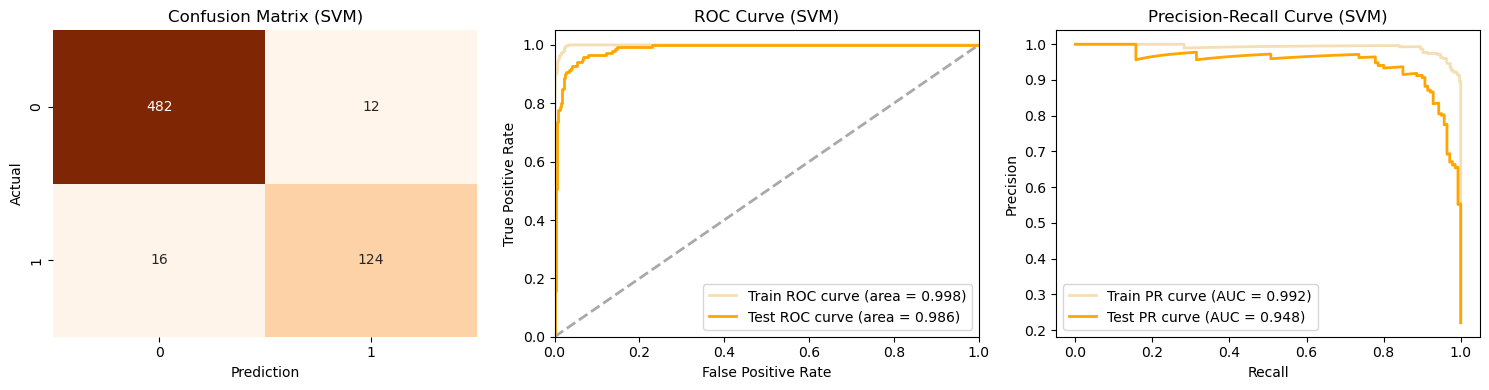

============ Metrics for SVM ============
ROC-AUC Training Set: 	0.9980948044478527
ROC-AUC Test Set: 	0.9861336032388665
PR-AUC Training Set: 	0.9917288103943926
PR-AUC Test Set: 	0.9481783759569237
F1-score Training Set: 	0.9567901234567902
F1-score Test Set: 	0.8985507246376812
----------
Accuracy Test Set: 	0.9558359621451105
Precision Test Set: 	0.9117647058823529
Recall Test Set: 	0.8857142857142857
Specificity Test Set: 	0.9757085020242915
Training time (seconds): 0.271578311920166


In [76]:
# ========= METRICS ==========================================================

# 1. ROC Curve and ROC-AUC for Training Set (SVM)
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_pred_train_svm_proba[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# 2. ROC Curve and AUC for Test Set (SVM)
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_pred_test_svm_proba[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

# 3. PR Curve and PR-AUC for Training Set (SVM)
precision_train_svm, recall_train_svm, _ = precision_recall_curve(y_train, y_pred_train_svm_proba[:, 1])
pr_auc_train_svm = average_precision_score(y_train, y_pred_train_svm_proba[:, 1])

# 4. PR Curve and PR-AUC for Test Set (SVM)
precision_test_svm, recall_test_svm, _ = precision_recall_curve(y_test, y_pred_test_svm_proba[:, 1])
pr_auc_test_svm = average_precision_score(y_test, y_pred_test_svm_proba[:, 1])

# 5. F1 Score for Training Set (SVM)
f1_train_svm = f1_score(y_train, y_pred_train_svm_proba[:, 1] > 0.5)

# 6. F1 Score for Test Set (SVM)
f1_test_svm = f1_score(y_test, y_pred_test_svm_proba[:, 1] > 0.5)

# 7. Additional Metrics for Test Set - SVM
accuracy_svm = accuracy_score(y_true=y_test, y_pred=(y_pred_test_svm_proba[:, 1] > 0.5))
precision_svm = precision_score(y_true=y_test, y_pred=(y_pred_test_svm_proba[:, 1] > 0.5))
recall_svm = recall_score(y_true=y_test, y_pred=(y_pred_test_svm_proba[:, 1] > 0.5))

# Confusion Matrix for Test Set - SVM
conf_matrix_svm = confusion_matrix(y_true=y_test, y_pred=(y_pred_test_svm_proba[:, 1] > 0.5))
TN_svm, FP_svm, FN_svm, TP_svm = conf_matrix_svm.ravel()

# Specificity for Test Set - SVM
specificity_svm = TN_svm / (TN_svm + FP_svm)


# ========= PLOTS ==========================================================

# Plot ROC Curves, Precision-Recall Curves, and Confusion Matrix Heatmap
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1 - Confusion Matrix Heatmap for SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["0", "1"], yticklabels=["0", "1"], cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix (SVM)')
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('Actual')

# Plot 2 - ROC Curve for Training and Test (SVM)
axes[1].plot(fpr_train_svm, tpr_train_svm, color='wheat', lw=2, label='Train ROC curve (area = %0.3f)' % roc_auc_train_svm)
axes[1].plot(fpr_test_svm, tpr_test_svm, color='orange', lw=2, label='Test ROC curve (area = %0.3f)' % roc_auc_test_svm)
axes[1].plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (SVM)')
axes[1].legend(loc='lower right')

# Plot 3 - Precision-Recall Curve for Training and Test (SVM)
axes[2].plot(recall_train_svm, precision_train_svm, color='wheat', lw=2, label='Train PR curve (AUC = %0.3f)' % pr_auc_train_svm)
axes[2].plot(recall_test_svm, precision_test_svm, color='orange', lw=2, label='Test PR curve (AUC = %0.3f)' % pr_auc_test_svm)
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve (SVM)')
axes[2].legend(loc='lower left')

plt.tight_layout()
plt.show()

# Print Metrics for SVM
print("============ Metrics for SVM ============")
print(f'ROC-AUC Training Set: \t{roc_auc_train_svm}')
print(f'ROC-AUC Test Set: \t{roc_auc_test_svm}')
print(f'PR-AUC Training Set: \t{pr_auc_train_svm}')
print(f'PR-AUC Test Set: \t{pr_auc_test_svm}')
print(f'F1-score Training Set: \t{f1_train_svm}')
print(f'F1-score Test Set: \t{f1_test_svm}')
print('----------')
print(f'Accuracy Test Set: \t{accuracy_svm}')
print(f'Precision Test Set: \t{precision_svm}')
print(f'Recall Test Set: \t{recall_svm}')
print(f'Specificity Test Set: \t{specificity_svm}')
print(f'Training time (seconds): {total_time_svm}')

In [77]:
conf_matrix_svm

array([[482,  12],
       [ 16, 124]], dtype=int64)

**COMMENTS**:  

1. **Overall Performance**: The model exhibits outstanding performance, as demonstrated by the high ROC-AUC scores for both the training (0.9981) and test sets (0.9861). The accuracy on the test set is also impressive at 95.58%, indicating that **the model correctly classifies the majority of instances**. The precision of 91.18% is quite high, reflecting the model's ability to correctly identify positive instances. 

2. **Generalization and Overfitting**: The model shows a high level of generalization based on the comparison of training and test metrics. While the ROC-AUC score is slightly higher on the training set (0.9981) compared to the test set (0.9861), the PR-AUC score decreases from 0.9917 on the training set to 0.9482 on the test set. The F1-score significantly drops from 0.95 on the training set to 0.89 on the test set, suggesting that **the model is generalizing well and is not significantly overfitting**.

3. **Balance Between Precision and Recall**: The recall score of 88.57% indicates that the model correctly identifies most positive cases, while the specificity of 97.57% shows that it is highly effective in recognizing negative cases. The balance between precision (91.18%) and recall (88.57%) is well maintained, meaning **the model achieves a good trade-off between minimizing false positives and false negatives**. Given the low number of misclassifications in the confusion matrix (16 false negatives and 12 false positives), the model is highly reliable.  

### 6.4. K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a non-parametric, instance-based learning algorithm used for classification and regression. It classifies new data points based on the majority class of their K nearest neighbors in the feature space.  

KNN is simple, intuitive, and effective when decision boundaries are non-linear. However, it can be computationally expensive for large datasets since it requires storing all training samples and computing distances for each new prediction.  

Hyperparameters:  

- `n_neighbors` (K):  
  - Defines the number of neighbors considered when making a prediction.  
  - Smaller values lead to more flexible decision boundaries but may cause overfitting.  
  - Typical values: `3` to `50`.  

- `weights`:  
  - Determines how neighbors contribute to the final prediction.  
  - `'uniform'`: All neighbors have equal influence.  
  - `'distance'`: Closer neighbors have a greater impact.  

- `metric`:  
  - Specifies the distance function used to find the nearest neighbors.  
  - Common choices: `'euclidean'`, `'manhattan'`, `'minkowski'`.  
  - `'euclidean'` is most commonly used for continuous data.  

In [80]:
# KNN classifier object is created
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

#### 6.4.1. Hyperparameter search

In [82]:
# 1. Parameter grid for RandomizedSearchCV (coarse search) is defined
param_dist = {
    'n_neighbors': np.arange(1, 50, 2),  # Odd values for neighbors to avoid ties
    'weights': ['uniform', 'distance'],  # Weighting strategies
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Stratified K-Fold cross-validation strategy is defined
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# RandomizedSearchCV for coarse search is performed
knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, 
                                   param_distributions = param_dist, 
                                   n_iter = 20, 
                                   cv = stratified_kfold, 
                                   scoring = 'roc_auc', 
                                   n_jobs = -1, 
                                   random_state = 0
                                  )
random_search.fit(standardized_X_train, y_train)

# Best parameters from RandomizedSearchCV are printed
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

# 2. Parameter grid for GridSearchCV (fine search) is defined
param_grid = {
    'n_neighbors': np.arange(max(1, random_search.best_params_['n_neighbors'] - 2), 
                             random_search.best_params_['n_neighbors'] + 3, 1),
    'weights': [random_search.best_params_['weights']],
    'metric': [random_search.best_params_['metric']]
}

# GridSearchCV for fine search is performed
grid_search = GridSearchCV(knn, 
                           param_grid = param_grid, 
                           cv = stratified_kfold, 
                           scoring = 'roc_auc', 
                           n_jobs = -1
                          )
grid_search.fit(standardized_X_train, y_train)

# Best parameters from GridSearchCV are printed
print("Best parameters from GridSearchCV:", grid_search.best_params_)
print("Best estimator from GridSearchCV:", grid_search.best_estimator_)

# Results are retrieved and displayed
results = pd.DataFrame(grid_search.cv_results_)
results.filter(regex='(param.*|mean_t|std_t)')\
    .drop(columns='params')\
    .sort_values('mean_test_score', ascending=False) \
    .head(10)

Best parameters from RandomizedSearchCV: {'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan'}
Best parameters from GridSearchCV: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best estimator from GridSearchCV: KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')


,param_metric,param_n_neighbors,param_weights,mean_test_score,std_test_score
0,manhattan,11,distance,0.970424,0.007942
2,manhattan,13,distance,0.970303,0.009026
4,manhattan,15,distance,0.969793,0.008732
3,manhattan,14,distance,0.969791,0.008734
1,manhattan,12,distance,0.969267,0.008631


#### 6.4.2. Model Training
Once the best values for the hyperparameters are known, the model can be trained:

In [84]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
knn

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [85]:
# Store the initial time
start_time_knn = time.time()

# Train the model
knn.fit(standardized_X_train, y_train.values.ravel())

# Make predictions for the training set and the test set
y_pred_train_knn = knn.predict(standardized_X_train)
y_pred_test_knn = knn.predict(standardized_X_test)

# Make predictions in terms of probabilities
y_pred_train_knn_proba = knn.predict_proba(standardized_X_train)
y_pred_test_knn_proba = knn.predict_proba(standardized_X_test)

# Store the final time
end_time_knn = time.time()

# Calculate how long the model took to fit and make predictions
total_time_knn = end_time_knn - start_time_knn
print(f'{total_time_knn} seconds')


0.30719900131225586 seconds


#### 6.4.3. Validation Report (global and overfitting)

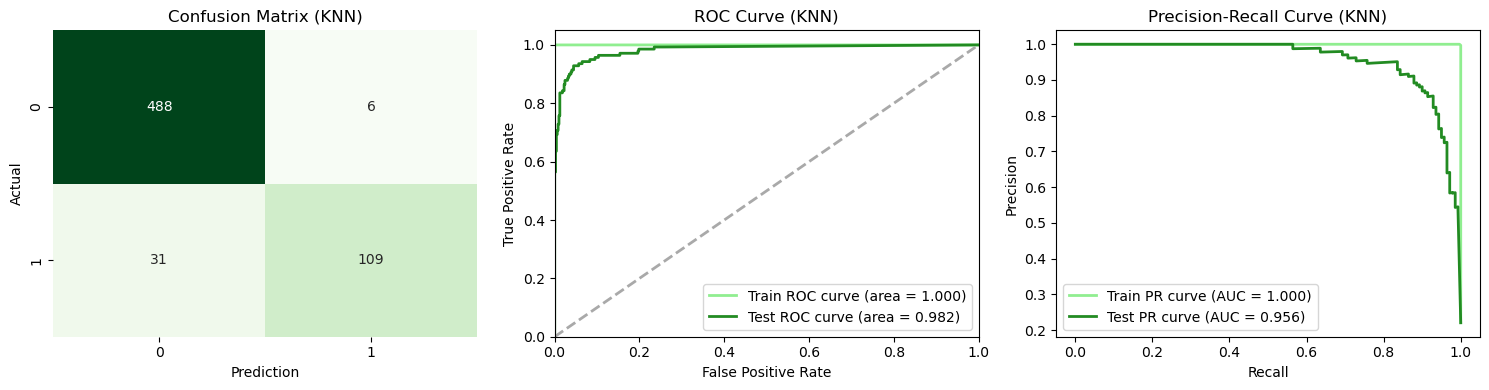

============ Metrics for KNN ============
ROC-AUC Training Set: 	0.9999986686264485
ROC-AUC Test Set: 	0.9823163678426836
PR-AUC Training Set: 	0.9999906193129585
PR-AUC Test Set: 	0.9559942911480656
F1-score Training Set: 	0.9984639016897081
F1-score Test Set: 	0.8549019607843137
----------
Accuracy Test Set: 	0.9416403785488959
Precision Test Set: 	0.9478260869565217
Recall Test Set: 	0.7785714285714286
Specificity Test Set: 	0.9878542510121457
Training time (seconds): 0.30719900131225586


In [87]:
# ========= METRICS ==========================================================

# 1. ROC Curve and ROC-AUC for Training Set (KNN)
fpr_train_knn, tpr_train_knn, _ = roc_curve(y_train, y_pred_train_knn_proba[:, 1])
roc_auc_train_knn = auc(fpr_train_knn, tpr_train_knn)

# 2. ROC Curve and AUC for Test Set (KNN)
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test, y_pred_test_knn_proba[:, 1])
roc_auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

# 3. PR Curve and PR-AUC for Training Set (KNN)
precision_train_knn, recall_train_knn, _ = precision_recall_curve(y_train, y_pred_train_knn_proba[:, 1])
pr_auc_train_knn = average_precision_score(y_train, y_pred_train_knn_proba[:, 1])

# 4. PR Curve and PR-AUC for Test Set (KNN)
precision_test_knn, recall_test_knn, _ = precision_recall_curve(y_test, y_pred_test_knn_proba[:, 1])
pr_auc_test_knn = average_precision_score(y_test, y_pred_test_knn_proba[:, 1])

# 5. F1 Score for Training Set (KNN)
f1_train_knn = f1_score(y_train, y_pred_train_knn_proba[:, 1] > 0.5)

# 6. F1 Score for Test Set (KNN)
f1_test_knn = f1_score(y_test, y_pred_test_knn_proba[:, 1] > 0.5)

# 7. Additional Metrics for Test Set - KNN
accuracy_knn = accuracy_score(y_true=y_test, y_pred=(y_pred_test_knn_proba[:, 1] > 0.5))
precision_knn = precision_score(y_true=y_test, y_pred=(y_pred_test_knn_proba[:, 1] > 0.5))
recall_knn = recall_score(y_true=y_test, y_pred=(y_pred_test_knn_proba[:, 1] > 0.5))

# Confusion Matrix for Test Set - KNN
conf_matrix_knn = confusion_matrix(y_true=y_test, y_pred=(y_pred_test_knn_proba[:, 1] > 0.5))
TN_knn, FP_knn, FN_knn, TP_knn = conf_matrix_knn.ravel()

# Specificity for Test Set - KNN
specificity_knn = TN_knn / (TN_knn + FP_knn)


# ========= PLOTS ==========================================================

# Plot ROC Curves, Precision-Recall Curves, and Confusion Matrix Heatmap
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1 - Confusion Matrix Heatmap for KNN
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens",
            xticklabels=["0", "1"], yticklabels=["0", "1"], cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix (KNN)')
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('Actual')

# Plot 2 - ROC Curve for Training and Test (KNN)
axes[1].plot(fpr_train_knn, tpr_train_knn, color='lightgreen', lw=2, label='Train ROC curve (area = %0.3f)' % roc_auc_train_knn)
axes[1].plot(fpr_test_knn, tpr_test_knn, color='forestgreen', lw=2, label='Test ROC curve (area = %0.3f)' % roc_auc_test_knn)
axes[1].plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (KNN)')
axes[1].legend(loc='lower right')

# Plot 3 - Precision-Recall Curve for Training and Test (KNN)
axes[2].plot(recall_train_knn, precision_train_knn, color='lightgreen', lw=2, label='Train PR curve (AUC = %0.3f)' % pr_auc_train_knn)
axes[2].plot(recall_test_knn, precision_test_knn, color='forestgreen', lw=2, label='Test PR curve (AUC = %0.3f)' % pr_auc_test_knn)
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve (KNN)')
axes[2].legend(loc='lower left')

plt.tight_layout()
plt.show()

# Print Metrics for KNN
print("============ Metrics for KNN ============")
print(f'ROC-AUC Training Set: \t{roc_auc_train_knn}')
print(f'ROC-AUC Test Set: \t{roc_auc_test_knn}')
print(f'PR-AUC Training Set: \t{pr_auc_train_knn}')
print(f'PR-AUC Test Set: \t{pr_auc_test_knn}')
print(f'F1-score Training Set: \t{f1_train_knn}')
print(f'F1-score Test Set: \t{f1_test_knn}')
print('----------')
print(f'Accuracy Test Set: \t{accuracy_knn}')
print(f'Precision Test Set: \t{precision_knn}')
print(f'Recall Test Set: \t{recall_knn}')
print(f'Specificity Test Set: \t{specificity_knn}')
print(f'Training time (seconds): {total_time_knn}')


**COMMENTS:**

1. **Overall Performance**: the model performs well, with a high ROC-AUC (0.9823) and PR-AUC (0.9560) on the test set. Accuracy is also strong at 94.16%, and precision is particularly high (94.78%), meaning the model makes confident positive predictions. However, **the recall is lower** (77.86%), suggesting that some positive cases are missed.

2. **Generalization and Overfitting**: **the model shows signs of overfitting**, as the training ROC-AUC (0.9999) and PR-AUC (0.9999) are significantly higher than the test scores. The F1-score also drops from 0.998 in training to 0.8549 in testing, indicating that the model does not generalize perfectly and may benefit from hyperparameter tuning.

3. **Balance Between Precision and Recall**: The model prioritizes precision (94.78%) over recall (77.86%), meaning it minimizes false positives but at the cost of missing some true positives (31 false negatives). Specificity is very high (98.79%), showing strong performance in identifying negative cases. Adjustments may be needed to improve recall.

## 7. Overall Models Comparison

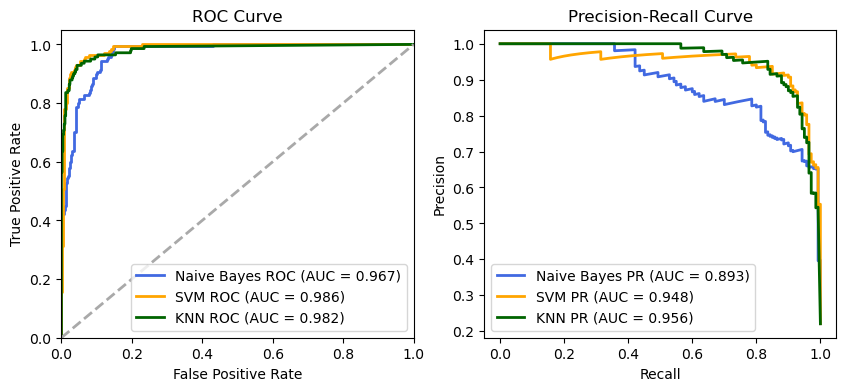

In [90]:
# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 1. ROC Curve
axes[0].plot(fpr_test_nb, tpr_test_nb, color='royalblue', lw=2, label=f'Naive Bayes ROC (AUC = {roc_auc_test_nb:.3f})')
axes[0].plot(fpr_test_svm, tpr_test_svm, color='orange', lw=2, label=f'SVM ROC (AUC = {roc_auc_test_svm:.3f})')
axes[0].plot(fpr_test_knn, tpr_test_knn, color='darkgreen', lw=2, label=f'KNN ROC (AUC = {roc_auc_test_knn:.3f})')  # KNN ROC
axes[0].plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc='lower right')

# 2. Precision-Recall Curve
axes[1].plot(recall_test_nb, precision_test_nb, color='royalblue', lw=2, label=f'Naive Bayes PR (AUC = {pr_auc_test_nb:.3f})')
axes[1].plot(recall_test_svm, precision_test_svm, color='orange', lw=2, label=f'SVM PR (AUC = {pr_auc_test_svm:.3f})')
axes[1].plot(recall_test_knn, precision_test_knn, color='darkgreen', lw=2, label=f'KNN PR (AUC = {pr_auc_test_knn:.3f})')  # KNN PR
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc='lower left')

# Display the plots
# plt.savefig("NB_vs_SVM_vs_KNN.png", dpi=600)
plt.show()

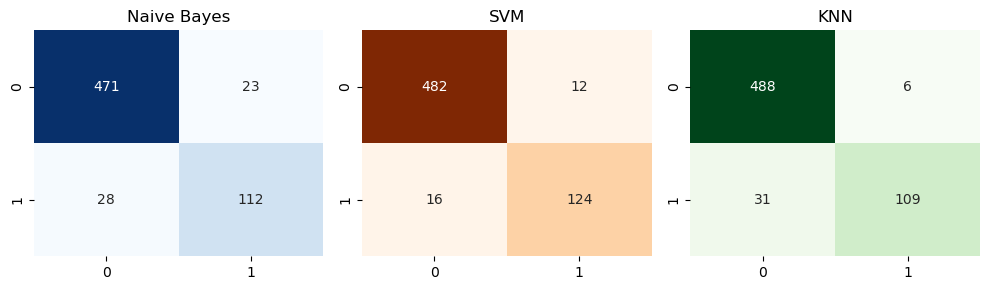

In [91]:
# Create a figure for the heatmaps
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Naive Bayes Heatmap
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["0", "1"], yticklabels=["0", "1"], cbar=False, ax=axes[0])
axes[0].set_title('Naive Bayes')

# SVM Heatmap
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["0", "1"], yticklabels=["0", "1"], cbar=False, ax=axes[1])
axes[1].set_title('SVM')

# KNN Heatmap
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens",
            xticklabels=["0", "1"], yticklabels=["0", "1"], cbar=False, ax=axes[2])
axes[2].set_title('KNN')

# Display the heatmaps
plt.tight_layout()
plt.show()



| **Metric**                    | **Naive Bayes**   | **SVM**           | **KNN**           |
|-------------------------------|-------------------|-------------------|-------------------|
| **ROC-AUC Test Set**           | 0.9670            | **0.9861**        | 0.9823            |
| **PR-AUC Test Set**            | 0.8926            | 0.9482            | **0.9560**        |
| **F1-score Test Set**          | 0.8145            | 0.8986            | **0.8549**        |
| **Accuracy Test Set**          | 0.9196            | **0.9558**        | 0.9416            |
| **Precision Test Set**         | 0.8296            | 0.9118            | **0.9478**        |
| **Recall Test Set**            | 0.8000            | **0.8857**        | 0.7786            |
| **Specificity Test Set**       | 0.9534            | 0.9757            | **0.9879**        |
| **Training time (seconds)**    | **0.0039**        | 0.2715            | 0.3071           |

#### CONCLUSION

In the case of 👶🏻🩺 Fetal Health Clasiffication, recall is crucial because **it's mandatory to minimize the numer of false negatives**, in order to avoid babies with an abnormal condition not being treated at time.  Given this context, even though the KNN model seems the most promisin, its **recall**  is the lowest of the three, making it to miss a significant number of positive cases. For this reason, **SVM is the most appropriate model** for the task due to its superior recall and excellent performance across other metrics like ROC-AUC.


**Final Thoughts:**

- For **real-time diagnosis**, **Naive Bayes** is clearly faster and also well balanced. Although the difference in time might not seem significant, in cases where larger models when more data are used, and on smaller machines, this speed advantage could become substantial. **Naive Bayes**'s simplicity and efficiency make it a great choice for time-sensitive applications where computational resources might be limited.

- In any case, it is important to emphasize that one algorithm is not always a better option than the other. **Depending on the problem to be solved**, the type of data, the number of variables, the adjustment of hyperparameters, as well as the available time and computational capacity, will play a decisive role in choosing one method over another.



*I hope you enjoyed as much as I did :)*

Marcos.